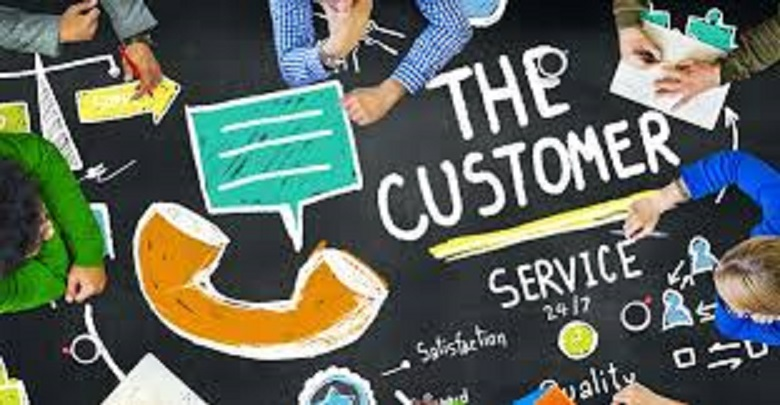

#### <a id='e'></a>
<h1 style='background-color:pink;font-family:newtimeroman;font-size:350%;text-align:center;border-radius:15px 50px;'>Credit Card Customer</h1>

<div style="border-radius:10px; border:maroon solid; padding: 15px; background-color: #FFFFF0; font-size:110%; text-align:left">
<a id="contents_tabel"></a>
<h3 align="left"><font color='magenta'>📌Table of Contents:</font></h3>

* [1 | Import neccessary libraries](#import)
* [2 | Our Dataset](#dataset)
* [3 | Preprocessing](#preprocessing)
    
     - [3.1 | Statistics summary of the dataframe](#statistics) 
* [4 | Missing Value Detection](#missingvalues)
    
     - [4.1 | Plot to visualize the missing value proportion](#missingvalueproportion)
     - [4.2 | Handling Missing Value using Iterative Imputer](#handelinmissingvalues)
* [5 | Duplicate Values Detection](#duplicates)
* [6 | Outlier Detection](#outlier)
* [7 | Calculates the Correlations](#corrolation)
* [8 | Univariate Analysis](#univariate)
* [9 | Modeling](#models)
    
    - [9.1 | Scale Data using Standard Scaler](#scale)
* [10 | K-mean](#kmean)
    
    - [10.1 | Elbow Method](#elbow)
* [11 | Gaussian mixture model](#GMD)
* [12 | Agglomerative Clustering](#agglomerative)
* [13 | MiniBatchKMeans](#minibatch)
* [14 | Comparing models](#compare)
* [15 | Eventually](#final)

#### <a id='e'></a>
<h1 style='background-color:pink;font-family:newtimeroman;font-size:350%;text-align:center;border-radius:15px 50px;'>1 : Import neccessary libraries</h1>

[📌 Table of Contents](#contents_tabel)

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#!pip install missingno
from matplotlib import colors
%matplotlib inline
from itertools import product
import missingno

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MiniBatchKMeans

from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.metrics import calinski_harabasz_score

import warnings 
warnings.filterwarnings("ignore")

#### <a id='e'></a>
<h1 style='background-color:pink;font-family:newtimeroman;font-size:350%;text-align:center;border-radius:15px 50px;'>2 : Our Dataset</h1>

[📌 Table of Contents](#contents_tabel)

<div style="border-radius:10px; border:maroon solid; padding: 15px; background-color: Pink; font-size:110%; text-align:left">

<h3 align="left"><font color='maroon'>Aim:</font></h3>
In this project it requires to develop a customer segmentation to define marketing strategy through machine learning techniqe. The sample dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.  

<h3 align="left"><font color='maroon'> About Our Dataset:</font></h3>
    
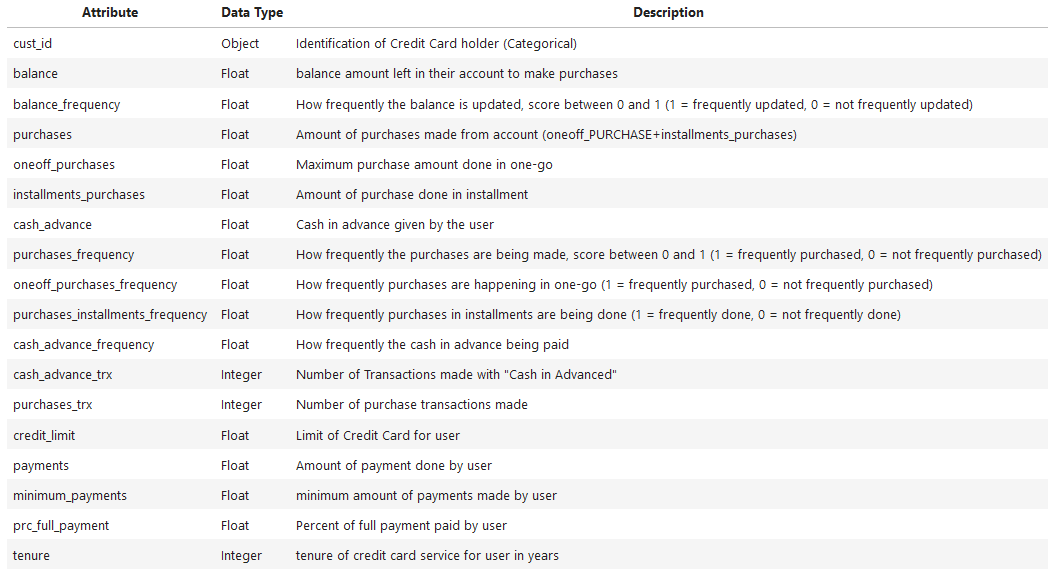


In [19]:
Data = pd.read_csv("D:\دوره ماشین لرنینگ\clustring\Customer_Data.csv")

In [20]:
df = pd.DataFrame(Data)
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

#### <a id='e'></a>
<h1 style='background-color:pink;font-family:newtimeroman;font-size:350%;text-align:center;border-radius:15px 50px;'>3 : Preprocessing</h1>

[📌 Table of Contents](#contents_tabel)

<a id="bivariate_cat"></a>
# <b><span style='color:#ED0DD9'>3.1 |</span><span style='color:purple'> Statistics summary of the dataframe</span></b>

In [21]:
df.describe(include='all')

CUST_ID       BALANCE  BALANCE_FREQUENCY     PURCHASES  \
count     8950   8950.000000        8950.000000   8950.000000   
unique    8950           NaN                NaN           NaN   
top     C10001           NaN                NaN           NaN   
freq         1           NaN                NaN           NaN   
mean       NaN   1564.474828           0.877271   1003.204834   
std        NaN   2081.531879           0.236904   2136.634782   
min        NaN      0.000000           0.000000      0.000000   
25%        NaN    128.281915           0.888889     39.635000   
50%        NaN    873.385231           1.000000    361.280000   
75%        NaN   2054.140036           1.000000   1110.130000   
max        NaN  19043.138560           1.000000  49039.570000   

        ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
count        8950.000000             8950.000000   8950.000000   
unique               NaN                     NaN           NaN   
top                  NaN                     NaN           NaN   
freq                 NaN                     NaN           NaN   
mean          592.437371              411.067645    978.871112   
std          1659.887917              904.338115   2097.163877   
min             0.000000                0.000000      0.000000   
25%             0.000000                0.000000      0.000000   
50%            38.000000               89.000000      0.000000   
75%           577.405000              468.637500   1113.821139   
max         40761.250000            22500.000000  47137.211760   

        PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count           8950.000000                 8950.000000   
unique                  NaN                         NaN   
top                     NaN                         NaN   
freq                    NaN                         NaN   
mean               0.490351                    0.202458   
std                0.401371                    0.298336   
min                0.000000                    0.000000   
25%                0.083333                    0.000000   
50%                0.500000                    0.083333   
75%                0.916667                    0.300000   
max                1.000000                    1.000000   

        PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
count                        8950.000000             8950.000000   
unique                               NaN                     NaN   
top                                  NaN                     NaN   
freq                                 NaN                     NaN   
mean                            0.364437                0.135144   
std                             0.397448                0.200121   
min                             0.000000                0.000000   
25%                             0.000000                0.000000   
50%                             0.166667                0.000000   
75%                             0.750000                0.222222   
max                             1.000000                1.500000   

        CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT      PAYMENTS  \
count        8950.000000    8950.000000   8949.000000   8950.000000   
unique               NaN            NaN           NaN           NaN   
top                  NaN            NaN           NaN           NaN   
freq                 NaN            NaN           NaN           NaN   
mean            3.248827      14.709832   4494.449450   1733.143852   
std             6.824647      24.857649   3638.815725   2895.063757   
min             0.000000       0.000000     50.000000      0.000000   
25%             0.000000       1.000000   1600.000000    383.276166   
50%             0.000000       7.000000   3000.000000    856.901546   
75%             4.000000      17.000000   6500.000000   1901.134317   
max           123.000000     358.000000  30000.000000  50721.483360   

        MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENUR

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### <span style='color:brown'> dropping Customer Id as is unique and not needed for model building: </span> </div>  

In [23]:
df.drop('CUST_ID', axis=1,inplace=True)

#### <a id='e'></a>
<h1 style='background-color:pink;font-family:newtimeroman;font-size:350%;text-align:center;border-radius:15px 50px;'>4 : Missing Value Detection</h1>

[📌 Table of Contents](#contents_tabel)

In [24]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<a id="bivariate_cat"></a>
# <b><span style='color:#ED0DD9'>4.1 |</span><span style='color:purple'> Plot to Visualize the Missing Value Proportion</span></b>

<AxesSubplot:>

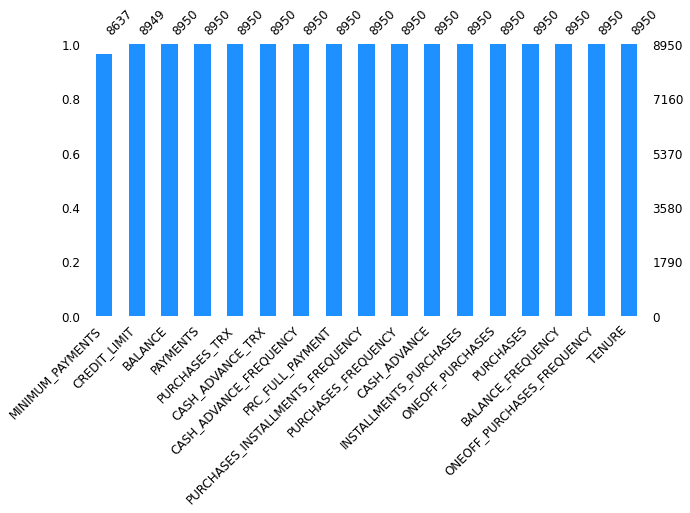

In [25]:
missingno.bar(df,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #F8EBEE; font-size:100%; text-align:left">

---
## **Notice:**
#### 1. Fill the the missing value for Credit Limit that had zero value in payments with 0, since we assume that if the payments is zero, the credit limit should be zero too
#### 2. Fill the rest of missing value using Simple Imputer with median as its initial strategy.
---

<a id="bivariate_cat"></a>
# <b><span style='color:#ED0DD9'>4.2 |</span><span style='color:purple'> Handling Missing Value using Iterative Imputer</span></b>

In [26]:
# filling missing value with iterative imputer
feat_cols = [col for col in df.columns]

itr_imputer = IterativeImputer(initial_strategy='median', 
                               min_value=0, random_state=2022)

df[feat_cols] = itr_imputer.fit_transform(df[feat_cols])

<AxesSubplot:>

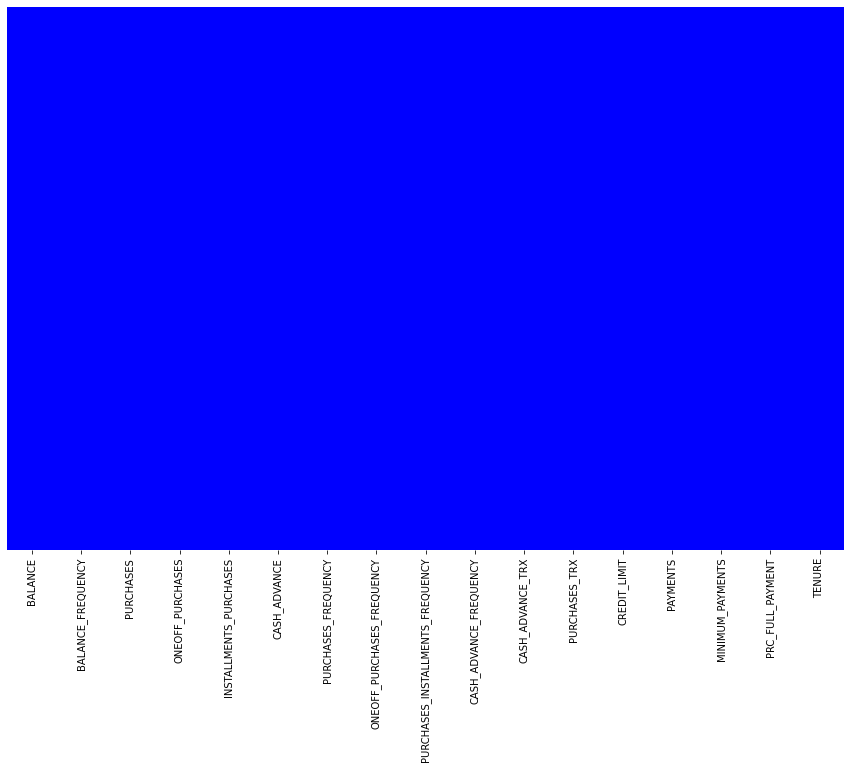

In [27]:
# plot to check the missing value
plt.figure(figsize = (15,10))
sns.heatmap(df.isnull(), cmap='bwr', cbar=False, yticklabels=False, xticklabels=df.columns)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   float64
 11  PURCHASES_TRX                     8950 non-null   float64
 12  CREDIT

#### <a id='e'></a>
<h1 style='background-color:pink;font-family:newtimeroman;font-size:350%;text-align:center;border-radius:15px 50px;'>5 : Duplicate Values Detection</h1>

[📌 Table of Contents](#contents_tabel)

In [29]:
#check whether there is any duplicate value
df[df.duplicated()]

Empty DataFrame
Columns: [BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE]
Index: []

### Done.✔

#### <a id='e'></a>
<h1 style='background-color:pink;font-family:newtimeroman;font-size:350%;text-align:center;border-radius:15px 50px;'>6 : Outlier Detection</h1>

[📌 Table of Contents](#contents_tabel)

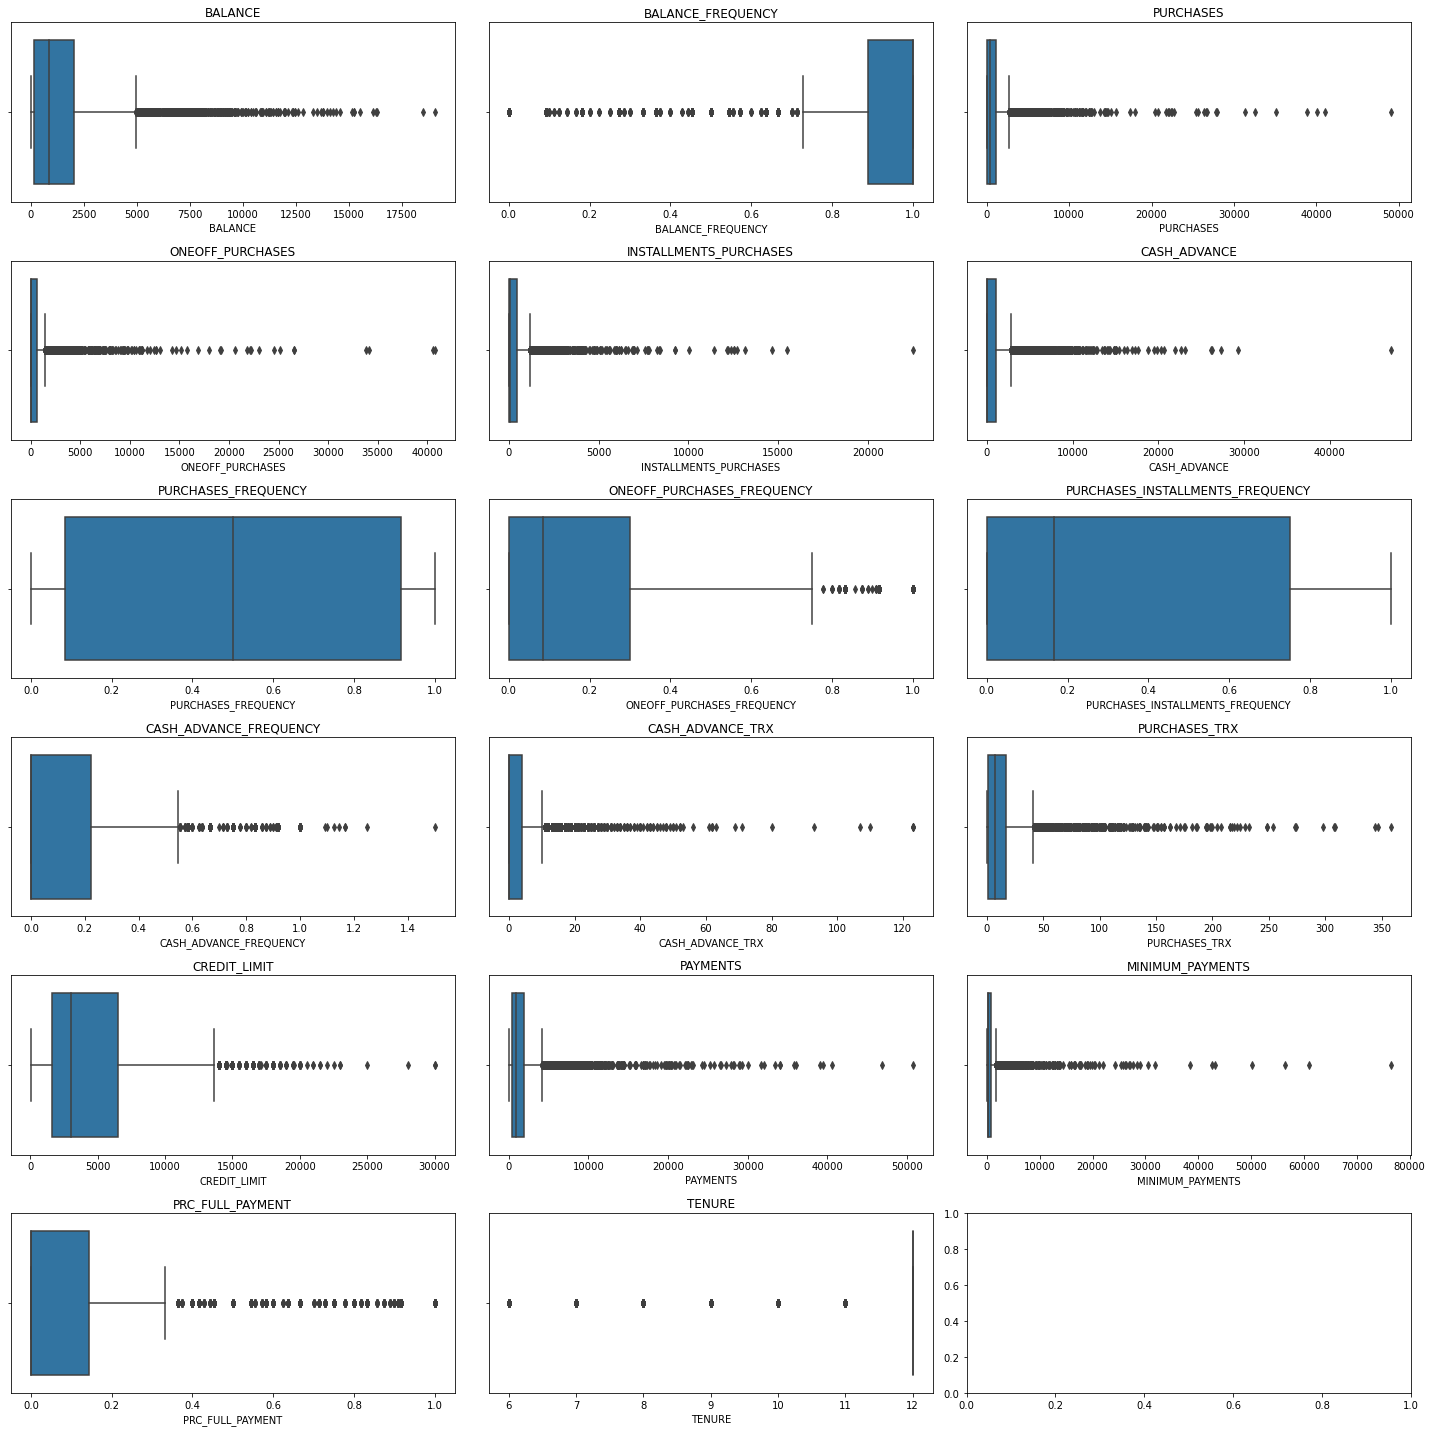

In [30]:
fig= plt.subplots(nrows=6 , ncols=3 , figsize=(20,20))
for i in range (len(df.columns)):
    plt.subplot(6,3,i+1)
    ax= sns.boxplot(df[df.columns[i]])
    plt.title(df.columns[i])
    plt.tight_layout()
plt.show()

* Since the outliers are mainly due to the nature of the dataset, we decide not to drop the outliers. We will try several model that could fit properly with this dataset.

#### <a id='e'></a>
<h1 style='background-color:pink;font-family:newtimeroman;font-size:350%;text-align:center;border-radius:15px 50px;'>7 : Calculates the Correlations</h1>

[📌 Table of Contents](#contents_tabel)

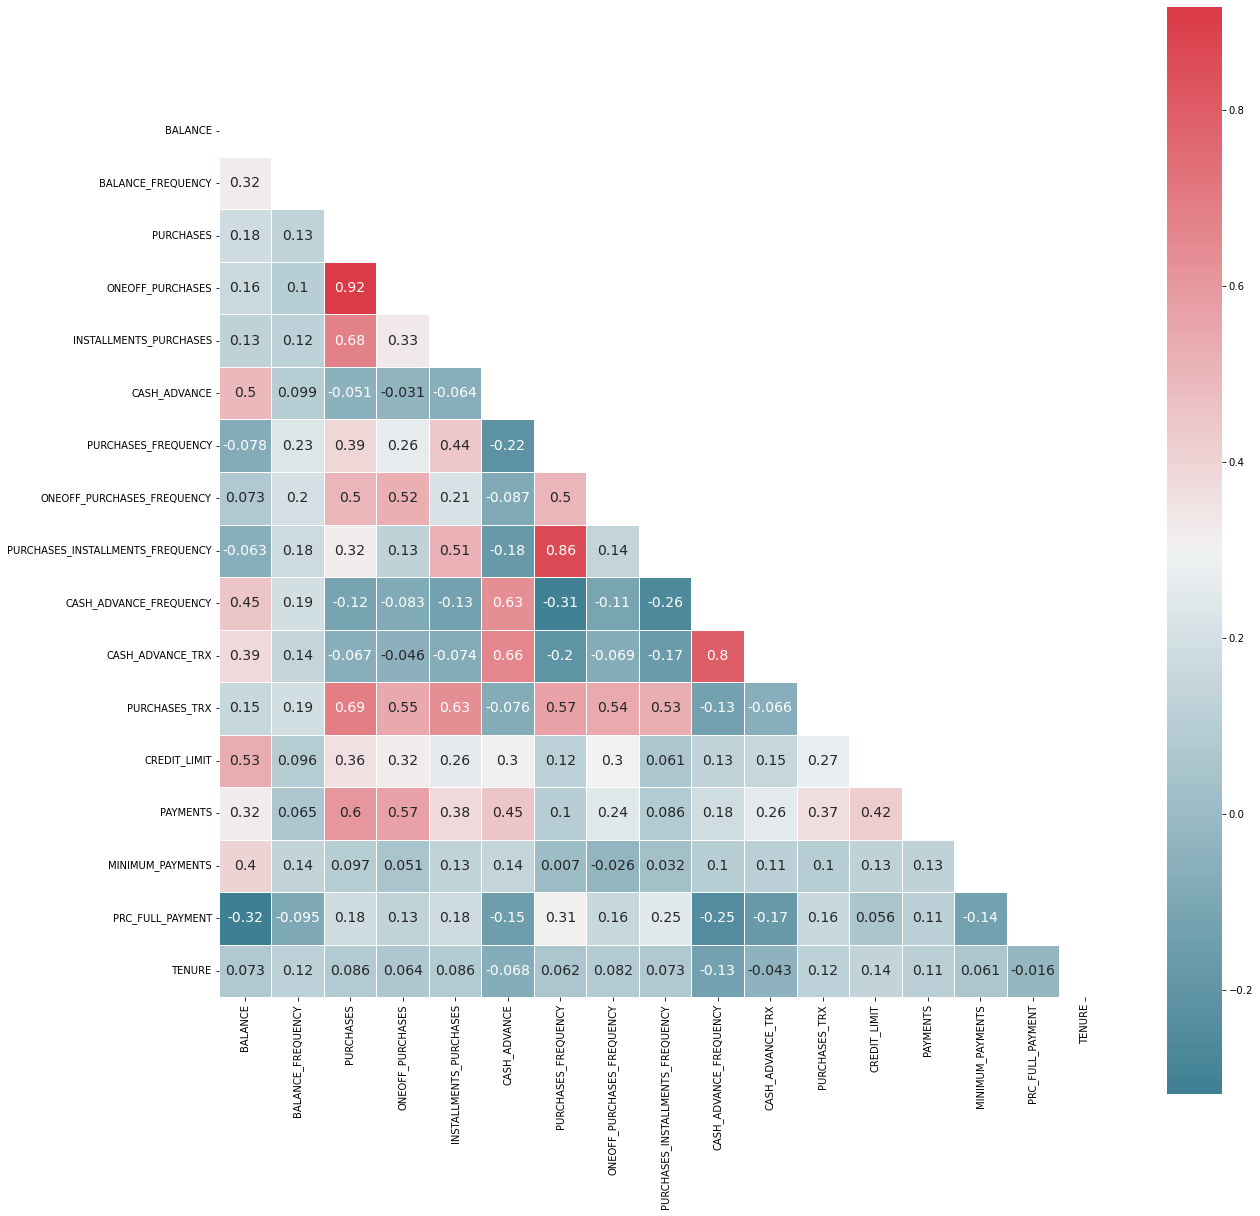

In [31]:
correlation = df.corr(method='pearson')

# uses the variable ax for single a Axes
fig, ax = plt.subplots()

# sets the figure size in inches
ax.figure.set_size_inches(20, 20)

# generates a mask for the upper triangle
mask = np.triu(np.ones_like(correlation, dtype=np.bool))

# generates a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# plots the heatmap
sns.heatmap(correlation, cmap=cmap, mask=mask, square=True, linewidths=.5, 
            annot=True, annot_kws={'size':14})

# displays the plot
plt.show()

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #F8EBEE; font-size:100%; text-align:left">
    
---
# **Notice:**

### We can see 3 pairs of strong correlation:
* "PURCHASES" and "ONEOFF_PURCHASES" --> 0.92
* "PURCHASES_FREQUENCY" and "PURCHASES_INSTALLMENT_FREQUENCY" --> 0.86
* "CASH_ADVANCE_TRX" and "CASH_ADVANCE_FREQUENCY" --> 0.8

---

#### <a id='e'></a>
<h1 style='background-color:pink;font-family:newtimeroman;font-size:350%;text-align:center;border-radius:15px 50px;'>8 : Univariate Analysis</h1>

[📌 Table of Contents](#contents_tabel)

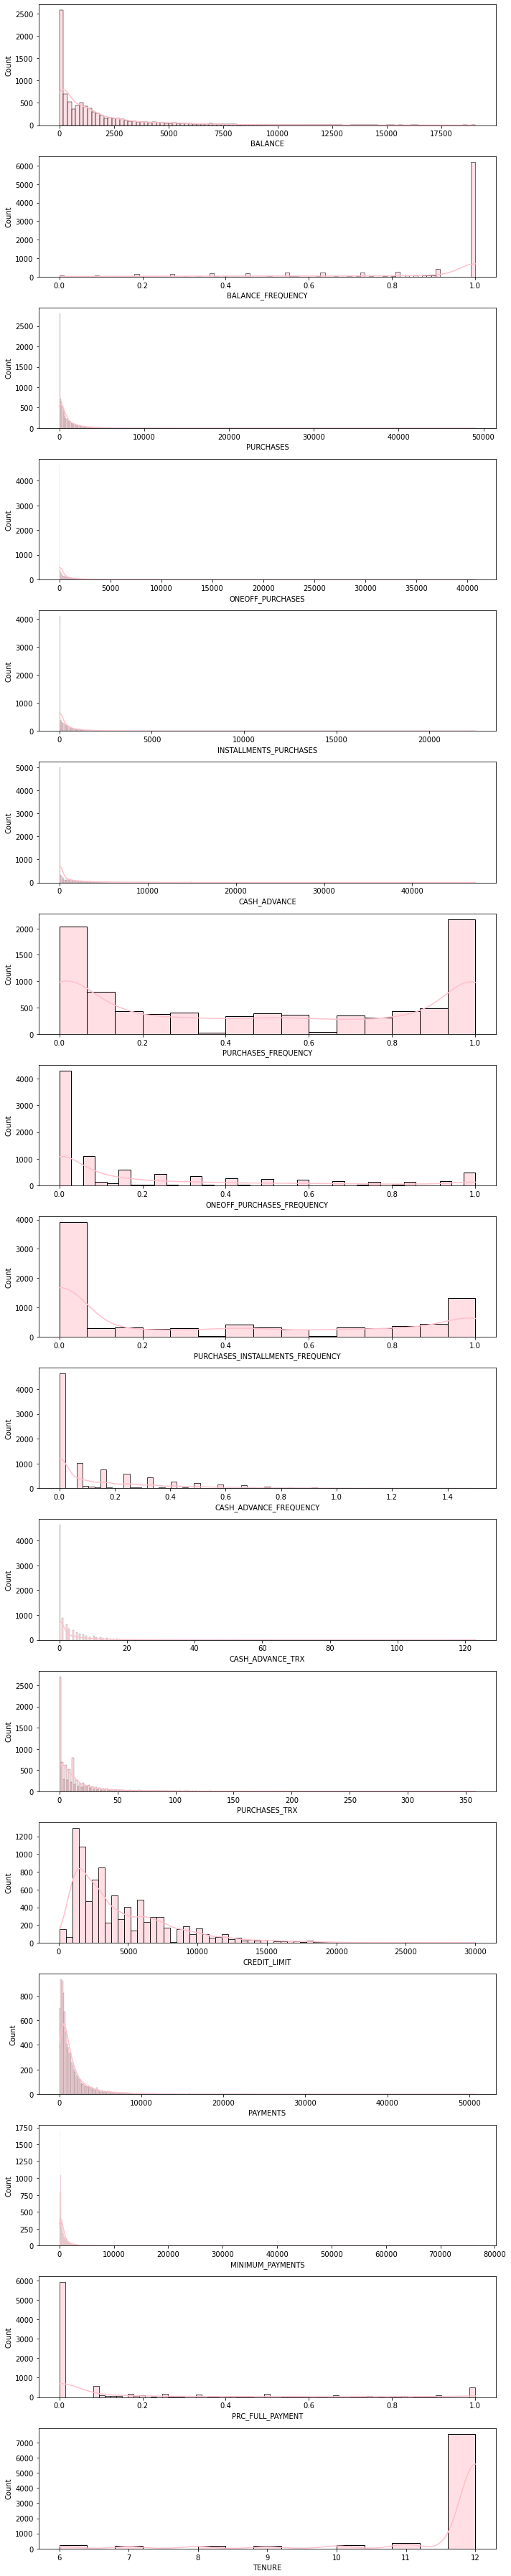

In [32]:
# creating distribution plot for analysis
#fig = plt.figure(figsize=(30, 25), constrained_layout=True,dpi=250)
#for i in range(len(df.columns)):
#    plt.subplot(6, 3, i+1)
#    sns.histplot(df[df.columns[i]], kde=True)
    
fig, ax = plt.subplots(17,1,figsize=(10,50))
for i, col in enumerate(df):
    sns.histplot(df[col], kde=True, ax=ax[i], color='pink')
fig.tight_layout()
plt.show()

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #F8EBEE; font-size:100%; text-align:left">
    
---
# **Notice:**

* 95% of user have credit limit below 13.000 with balance keep below 8.000. We assume this is the general population of the data reside. 
* Some feature like purchases, oneoff_purchases, INSTALLMENT_purchases, and cash_advance show the same trends as balance and credit limit. 
* balance frequency for 86% of users are updated frequently. We assume this occured due to the balance updated when the purchase made, installment paid, withdrawal, deposit, and cash advance used.
* There are 2 majority group of customer that made purchase, which is the never or rarely made any purchase and the often one. This could be explained more in after clustering.
* There are more user that paid using installment rather than oneoff payment. We assume the data was obtained from the bank that have high selling points on its credit card facilities.
* By its frequency, there are more user that purchase by installment rather than one off payment. 
* 98% of users pays the installment below 12.000 with the minimum amount are below 5.000. 
* Only around 5% user that had completely paid off the installment. We assume this happens due to data was updated periodically.
* 84% of users still use credit card in the 12th month. We assume the data obtained does not include customer that doesn't had credit card.

---

#### <a id='e'></a>
<h1 style='background-color:pink;font-family:newtimeroman;font-size:350%;text-align:center;border-radius:15px 50px;'>9 : Modeling</h1>

[📌 Table of Contents](#contents_tabel)

---
### **📎Here we try to model the data with the following models:**
* K-mean
* Gaussian mixture
* Agglomerative
* MiniBatchKMeans

---

<a id="bivariate_cat"></a>
# <b><span style='color:#ED0DD9'>9.1 |</span><span style='color:purple'> Scale Data using Standard Scaler</span></b>

In [33]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

#### <a id='e'></a>
<h1 style='background-color:pink;font-family:newtimeroman;font-size:350%;text-align:center;border-radius:15px 50px;'>10 : K-mean</h1>

[📌 Table of Contents](#contents_tabel)

---
The performance of the K-means clustering algorithm depends upon highly efficient clusters that it forms. But choosing the optimal number of clusters is a big task. There are some different ways to find the optimal number of clusters, but here we are discussing the most appropriate method to find the number of clusters or value of K. The method is given below:

---

<a id="bivariate_cat"></a>
# <b><span style='color:#ED0DD9'>10.1 |</span><span style='color:purple'> Elbow Method</span></b>

---
The Elbow method is one of the most popular ways to find the optimal number of clusters. This method uses the concept of WCSS value. WCSS stands for Within Cluster Sum of Squares, which defines the total variations within a cluster. The formula to calculate the value of WCSS (for 3 clusters) is given below:

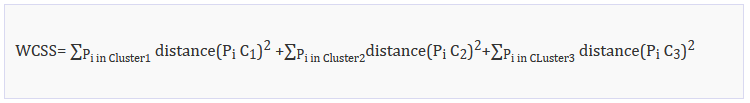

---

In [34]:
kmeans_set = {"init":"random","n_init":10,"max_iter":300,"random_state":1}

In [35]:
List = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, **kmeans_set)  # ** open dictionay
    kmeans.fit(scaled_features)
    List.append(kmeans.inertia_)

In [36]:
k1 = KneeLocator(range(1,11),List,curve="convex",direction="decreasing")
k1.elbow

4

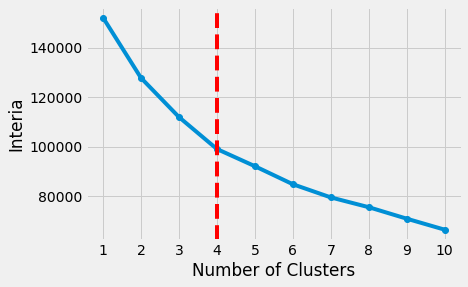

In [37]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,11),List,'-o')
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Interia")
plt.axvline(x=k1.elbow,color="r",label="axvline-full height",ls="--")
plt.show()

* Based on the elbow method, the optimal number of clusters for kmeans algorithm is equal to 4.

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #F8EBEE; font-size:100%; text-align:left">
    
### Sillhuette coefficients:
The technique provides a succinct graphical representation of how well each object has been classified. It was proposed by Belgian statistician Peter Rousseeuw in 1987.

In [38]:
silhouette_coefficients =[]

for k in range(2,11):
    kmeans=KMeans(n_clusters=k,**kmeans_set)
    kmeans.fit(scaled_features)
    score=silhouette_score(scaled_features,kmeans.labels_)
    silhouette_coefficients.append(score)

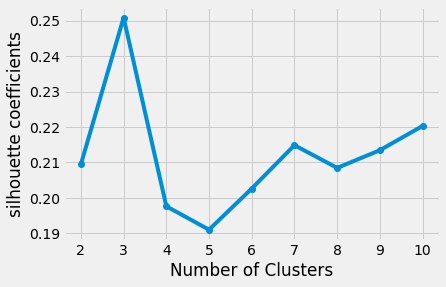

In [39]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,11),silhouette_coefficients,marker='o')
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette coefficients")
plt.show()

In [40]:
max(silhouette_coefficients)

0.2508657080988788

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #F8EBEE; font-size:100%; text-align:left">

### Calinski_harabasz:

The Calinski-Harabasz index (CH) is one of the clustering algorithms evaluation measures. It is most commonly used to evaluate the goodness of split by a K-Means clustering algorithm for a given number of clusters.

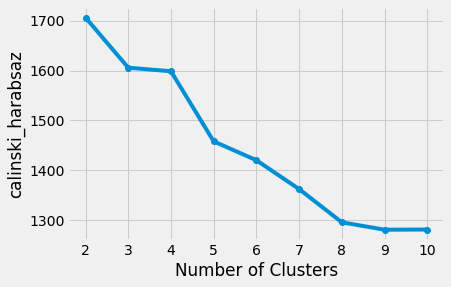

In [41]:
calinski_harabasz=[]

for k in range(2,11):
    kmeans=KMeans(n_clusters=k,**kmeans_set)
    kmeans.fit(scaled_features)
    score = metrics.calinski_harabasz_score(scaled_features,kmeans.labels_)
    calinski_harabasz.append(score)
    
    
plt.style.use("fivethirtyeight")
plt.plot(range(2,11),calinski_harabasz,marker='o')
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("calinski_harabsaz")
plt.show()

In [42]:
max(calinski_harabasz)

1706.1883436395337

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #F8EBEE; font-size:100%; text-align:left">
    
---
# **Notice:**

K-means clustering is a simplest and popular unsupervised machine learning algorithms . We can evaluate the algorithm by two ways such as elbow technique and silhouette technique . We saw differences between them above . I think silhouette technique gives us more precise score and number of k for k-means algorithm . However , we can also use elbow technique for quick response and intuition.
#### So 3 cluster with silhouette is best for k-mean

---

In [43]:
kmeans = KMeans(n_clusters=3,**kmeans_set)
kmeans.fit(scaled_features)
labels = kmeans.labels_

### View cluster centers (normalized centers, here ther are negative numbers)

In [44]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0  1.167109          0.344814 -0.289347        -0.206897   
1  0.314944          0.439892  1.528337         1.280514   
2 -0.367477         -0.178549 -0.233014        -0.204483   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              -0.304117     1.377435           -0.642257   
1               1.260783    -0.248182            1.143003   
2              -0.175184    -0.308630           -0.063364   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.306303                        -0.553598   
1                   1.561105                         0.956523   
2                  -0.235210                        -0.048827   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               1.561274         1.341012     -0.365728     0.600321   
1              -0.360454        -0.252054      1.680149     0.890411   
2              -0.333852        -0.298364     -0.243753    -0.335986   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0  0.445456         0.411057        -0.409931 -0.124512  
1  0.835307         0.163572         0.495471  0.303199  
2 -0.284539        -0.140048         0.006784 -0.028750

### viewing real centers (now we dont see negative number)

In [45]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY    PURCHASES ONEOFF_PURCHASES  \
0  3993.712839          0.958954   385.010747       249.030201   
1  2220.003291          0.981477  4268.520980      2717.828543   
2   799.602578          0.834974   505.367215       253.037425   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0             136.058130  3867.417590            0.232582   
1            1551.178267   458.421147            0.949093   
2             252.650482   331.658667            0.464920   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.111082                         0.144423   
1                   0.668166                         0.744584   
2                   0.132290                         0.345032   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               0.447571        12.400251      5.619197  6678.484658   
1               0.063014         1.528745     56.472065  7733.967611   
2               0.068337         1.212710      8.651037  3271.768905   

      PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0  3022.695041      1806.138968         0.033817  11.350690  
1  4151.276172      1228.283788         0.298632  11.923077  
2   909.432365       519.358534         0.155699  11.478843

## adding cluster column to dataframe

In [46]:
df_cluster_with_kmean = pd.concat([df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_with_kmean

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000               0.0            2.0        1000.0   
1                   0.250000               4.0            0.0        7000.0   
2                   0.000000               0.0           12.0        7500.0   
3                   0.083333               1.0            1.0        7500.0   
4                   0.000000               0.0            1.0        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000               0.0            6.0        1000.0   
8946                0.000000               0.0            6.0        1000.0   
8947                0.000000               0.0            5.0        1000.0   
8948                0.166667               2.0            0.0         500.0   
8949                0.333333               2.0           23.0        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0      201.802084        139.509787          0.000000    12.0        2  
1     4103.032597       1072.340217          0.222222    12.0        0  
2      622.066742        627.284787          0.000000    12.0        2  
3        0.000000        431.220633          0.000000    12.0        2  
4      678.334763        244.791237          0.000000    12.0        2  
...           ...               ...               ...     ...      ...  
8945   325.594462         48.886365          0.500000     6.0        2  
89

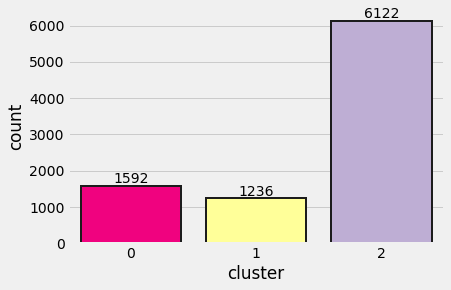

In [47]:
ax = sns.countplot(data=df_cluster_with_kmean, x='cluster', palette='Accent_r', saturation=1, edgecolor = "#1c1c1c", linewidth = 2)
for cont in ax.containers:
    ax.bar_label(cont)

### visualizing clusters by inversing results

[[3.99371284e+03 9.58953955e-01 3.85010747e+02 2.49030201e+02
  1.36058130e+02 3.86741759e+03 2.32581643e-01 1.11081686e-01
  1.44423225e-01 4.47571021e-01 1.24002509e+01 5.61919699e+00
  6.67848466e+03 3.02269504e+03 1.80613897e+03 3.38167967e-02
  1.13506901e+01]
 [2.22000329e+03 9.81477131e-01 4.26852098e+03 2.71782854e+03
  1.55117827e+03 4.58421147e+02 9.49092767e-01 6.68165586e-01
  7.44584181e-01 6.30137247e-02 1.52874494e+00 5.64720648e+01
  7.73396761e+03 4.15127617e+03 1.22828379e+03 2.98631501e-01
  1.19230769e+01]
 [7.99602578e+02 8.34974046e-01 5.05367215e+02 2.53037425e+02
  2.52650482e+02 3.31658667e+02 4.64919572e-01 1.32290077e-01
  3.45032205e-01 6.83369443e-02 1.21271034e+00 8.65103741e+00
  3.27176890e+03 9.09432365e+02 5.19358534e+02 1.55698779e-01
  1.14788433e+01]]


Text(39.10062514838556, 0.5, 'PURCHASES')

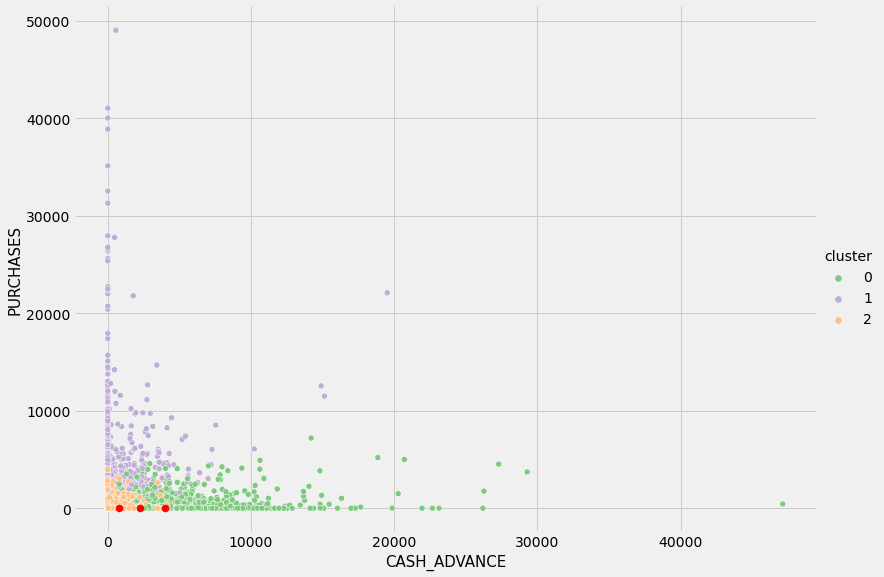

In [48]:
centroids = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids)
print(centroids)


sns.relplot(data = df_cluster_with_kmean ,x='CASH_ADVANCE' , y  ='PURCHASES', hue='cluster', palette='Accent' ,kind='scatter', height=8.27, aspect = 11.7/8.27)
plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=50)
plt.xlabel("CASH_ADVANCE",fontsize=15)
plt.ylabel("PURCHASES",fontsize=15)

### visualizing clusters on original data

[[4.79720357e+03 9.08473866e-01 1.04707237e+04 7.39299015e+03
  3.07789769e+03 5.38998332e+03 7.37381261e-01 5.82882687e-01
  5.92929851e-01 2.29106075e-01 9.18656716e+00 8.37910448e+01
  1.24705224e+04 1.79906949e+04 2.46049830e+03 3.26799679e-01
  1.18432836e+01]
 [3.37682451e+03 9.40893879e-01 1.58394509e+03 9.89334502e+02
  5.94920524e+02 2.08790518e+03 5.41583702e-01 3.18122643e-01
  3.85703944e-01 2.09391585e-01 5.70519481e+00 2.21445887e+01
  8.98030500e+03 2.86666855e+03 1.55615580e+03 1.35186513e-01
  1.17389610e+01]
 [8.54405135e+02 8.54038216e-01 6.02012470e+02 3.11449599e+02
  2.90862392e+02 4.94248036e+02 4.67071929e-01 1.53554670e-01
  3.52180372e-01 1.06846882e-01 2.25438057e+00 1.06472487e+01
  2.73714993e+03 9.95831540e+02 5.61094823e+02 1.56728266e-01
  1.14319090e+01]]


Text(39.10062514838556, 0.5, 'PURCHASES')

<Figure size 1080x576 with 0 Axes>

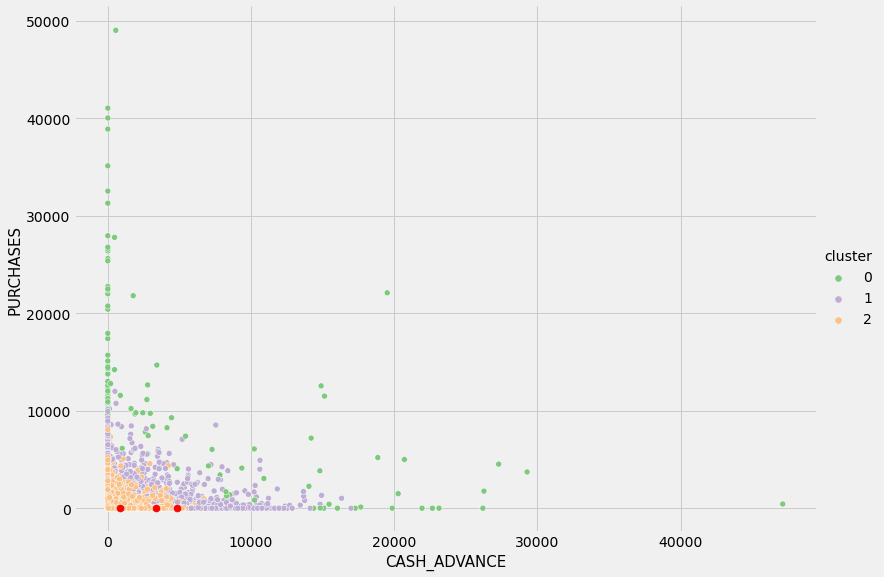

In [49]:
kmeans = KMeans(n_clusters=3,init= "random", random_state = 1).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)
plt.figure(figsize=(15,8))

df_kmean = df.copy()
df_kmean['cluster'] = kmeans.labels_
sns.relplot(data = df_kmean ,x='CASH_ADVANCE' , y  ='PURCHASES', hue='cluster', palette='Accent' ,kind='scatter', height=8.27, aspect = 11.7/8.27)
plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=50)
plt.xlabel("CASH_ADVANCE",fontsize=15)
plt.ylabel("PURCHASES",fontsize=15)

### Ploting some continues features for seeing how to clustering

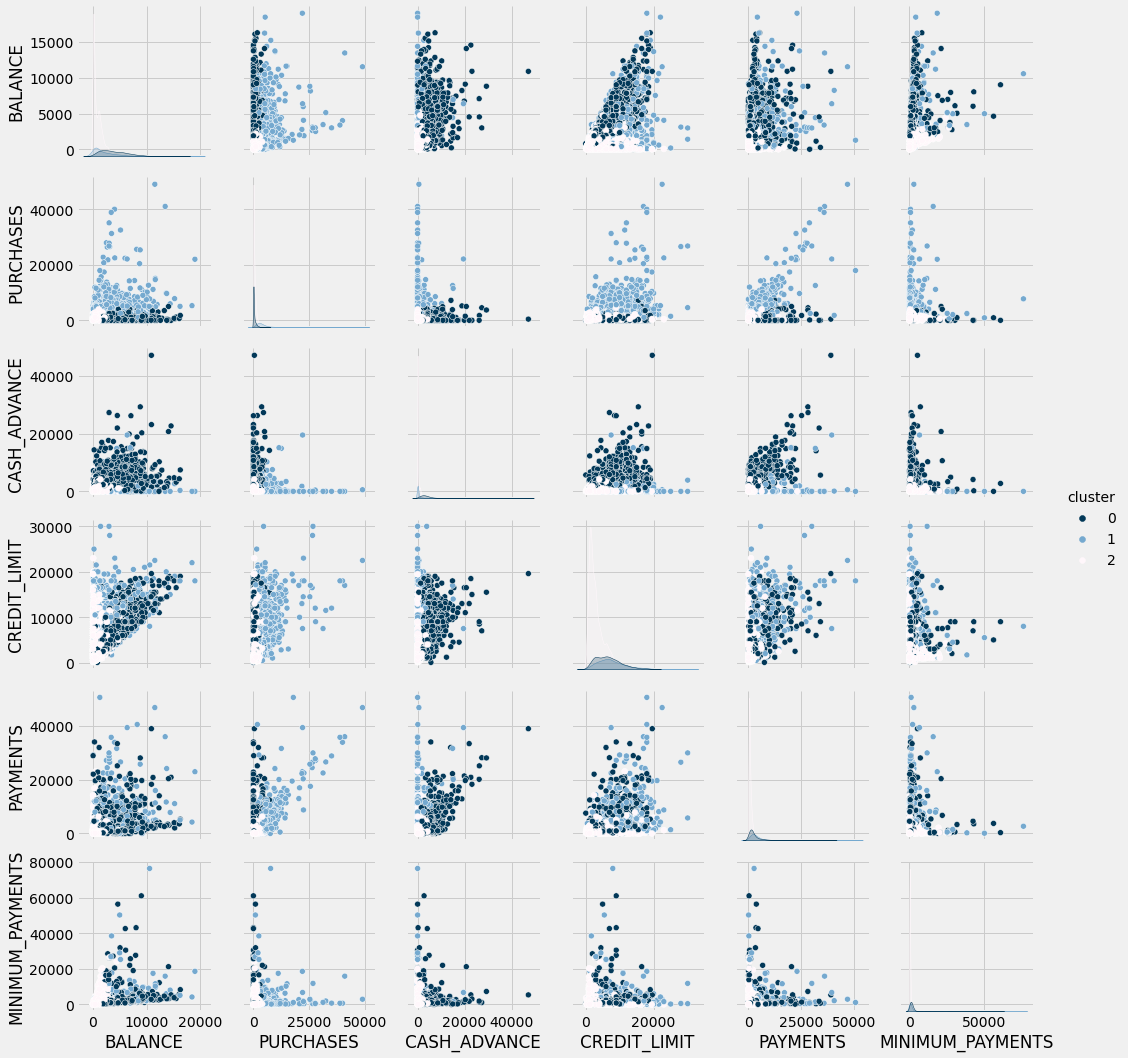

In [50]:
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","cluster"]
sns.pairplot( df_cluster_with_kmean[ best_cols ], hue="cluster",palette='PuBu_r')

#### <a id='e'></a>
<h1 style='background-color:pink;font-family:newtimeroman;font-size:350%;text-align:center;border-radius:15px 50px;'>11 : Gaussian mixture model</h1>

[📌 Table of Contents](#contents_tabel)

---
[Gaussian mixture models (GMM)](https://www.ecdc.europa.eu/en/covid-19/data) are a probabilistic concept used to model real-world data sets. GMMs are a generalization of Gaussian distributions and can be used to represent any data set that can be clustered into multiple Gaussian distributions. The Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mix of Gaussian distributions with unknown parameters. A Gaussian mixture model can be used for clustering, which is the task of grouping a set of data points into clusters. GMMs can be used to find clusters in data sets where the clusters may not be clearly defined. Additionally, GMMs can be used to estimate the probability that a new data point belongs to each cluster. Gaussian mixture models are also relatively robust to outliers, meaning that they can still yield accurate results even if there are some data points that do not fit neatly into any of the clusters. This makes GMMs a flexible and powerful tool for clustering data. It can be understood as a probabilistic model where Gaussian distributions are assumed for each group and they have means and covariances which define their parameters. GMM consists of two parts – mean vectors (μ) & covariance matrices (Σ). A Gaussian distribution is defined as a continuous probability distribution that takes on a bell-shaped curve. Another name for Gaussian distribution is the normal distribution. Here is a picture of Gaussian mixture models:

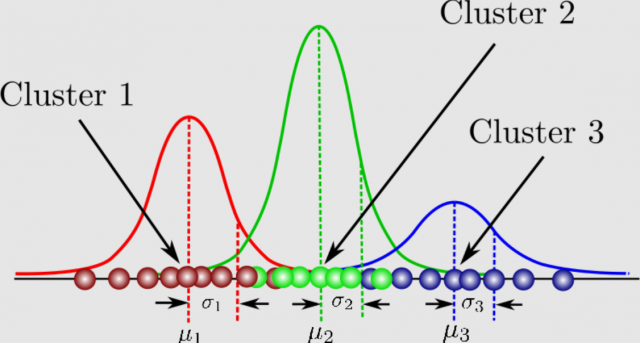

---

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #F8EBEE; font-size:100%; text-align:left">
    
### Sillhuette coefficients:

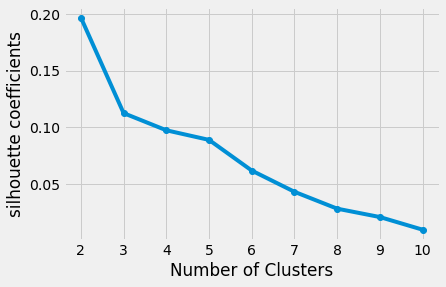

In [51]:
sil_gmm = []
for k in range(2,11):#this range is optional
    gmm = GaussianMixture(n_components=k, random_state=1 )#each gaussian in your mixture is one component 
    gmm.fit(scaled_features)
    score = silhouette_score(scaled_features, gmm.predict(scaled_features),metric='euclidean',random_state=5)
    sil_gmm.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), sil_gmm,marker='o')
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette coefficients")
plt.show()    

In [52]:
max(sil_gmm)

0.19692270257015043

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #F8EBEE; font-size:100%; text-align:left">
    
### Calinski_harabasz:

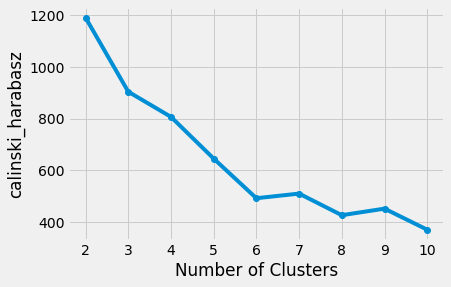

In [53]:
calinski_harabaz = []
for k in range (2,11):
    gmm = GaussianMixture(n_components=k, random_state=1 )#each gaussian in your mixture is one component
    gmm.fit(scaled_features)
    metrics.calinski_harabasz_score(scaled_features, gmm.predict(scaled_features))
    calinski_harabaz.append(metrics.calinski_harabasz_score(scaled_features, gmm.predict(scaled_features)))
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), calinski_harabaz,marker='o')
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("calinski_harabasz")
plt.show()

In [54]:
max(calinski_harabaz)

1190.4095880367818

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #F8EBEE; font-size:100%; text-align:left">
    
---
### **Notice:**
### So 2 cluster with silhouette=0.19692270257015043, is the best for gaussian mixture modeling

---

In [55]:
# In gaussian method, we don't have centers, we have mean for each cluster
# view normal cordinates means of clusters(in gaussian we can show mean, instead center)
gmm = GaussianMixture(n_components=2, random_state=1 )
gmm.fit(scaled_features)
labels = gmm.predict(scaled_features)
cluster_means = pd.DataFrame(data = gmm.means_, columns = [df.columns])
cluster_means

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0  0.350534          0.338799  0.638307         0.525952   
1 -0.183027         -0.176900 -0.333284        -0.274619   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0               0.543361     0.145635            0.682941   
1              -0.283709    -0.076042           -0.356589   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.816962                         0.470117   
1                  -0.426567                        -0.245466   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0              -0.067405         0.013730      0.720309     0.476133   
1               0.035195        -0.007169     -0.376100    -0.248607   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0  0.546551         0.332844         0.156307  0.208147  
1 -0.285375        -0.173790        -0.081614 -0.108681

In [56]:
# view real cordinates means of clusters(in gaussian we can show mean, instead center)
cluster_means = scaler.inverse_transform(cluster_means)
cluster_means = pd.DataFrame(data = cluster_means, columns = [df.columns])
cluster_means

BALANCE BALANCE_FREQUENCY    PURCHASES ONEOFF_PURCHASES  \
0  2294.080860          0.957529  2366.956632       1465.40980   
1  1183.519983          0.835365   291.138551        136.62552   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0             902.421925  1284.274600            0.764448   
1             154.513031   819.408426            0.347234   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.446173                         0.551274   
1                   0.075205                         0.266883   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               0.121656         3.342525     32.614013  6226.632633   
1               0.142187         3.199904      5.361384  3589.693108   

      PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0  3315.355676      1623.518187         0.199432  11.795873  
1   907.011346       440.574268         0.129844  11.371875

In [57]:
df_cluster_with_gmm = pd.concat([df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_with_gmm

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000               0.0            2.0        1000.0   
1                   0.250000               4.0            0.0        7000.0   
2                   0.000000               0.0           12.0        7500.0   
3                   0.083333               1.0            1.0        7500.0   
4                   0.000000               0.0            1.0        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000               0.0            6.0        1000.0   
8946                0.000000               0.0            6.0        1000.0   
8947                0.000000               0.0            5.0        1000.0   
8948                0.166667               2.0            0.0         500.0   
8949                0.333333               2.0           23.0        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0      201.802084        139.509787          0.000000    12.0        1  
1     4103.032597       1072.340217          0.222222    12.0        1  
2      622.066742        627.284787          0.000000    12.0        0  
3        0.000000        431.220633          0.000000    12.0        0  
4      678.334763        244.791237          0.000000    12.0        1  
...           ...               ...               ...     ...      ...  
8945   325.594462         48.886365          0.500000     6.0        1  
89

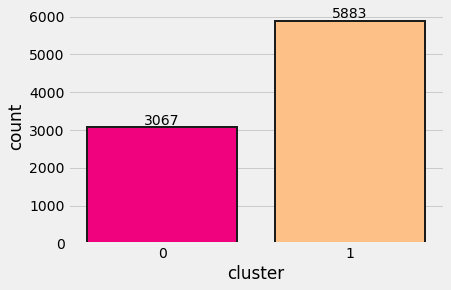

In [58]:
ax = sns.countplot(data=df_cluster_with_gmm, x='cluster', palette='Accent_r', saturation=1, edgecolor = "#1c1c1c", linewidth = 2)
for cont in ax.containers:
    ax.bar_label(cont)

## Visualizing clusters by inversing results

cluster means:
 [[2.29408086e+03 9.57528983e-01 2.36695663e+03 1.46540980e+03
  9.02421925e+02 1.28427460e+03 7.64447773e-01 4.46173224e-01
  5.51273846e-01 1.21655684e-01 3.34252490e+00 3.26140134e+01
  6.22663263e+03 3.31535568e+03 1.62351819e+03 1.99431727e-01
  1.17958726e+01]
 [1.18351998e+03 8.35364861e-01 2.91138551e+02 1.36625520e+02
  1.54513031e+02 8.19408426e+02 3.47234043e-01 7.52046023e-02
  2.66882951e-01 1.42187064e-01 3.19990351e+00 5.36138379e+00
  3.58969311e+03 9.07011346e+02 4.40574268e+02 1.29844037e-01
  1.13718748e+01]]


Text(37.85165642806267, 0.5, 'PURCHASES_TRX')

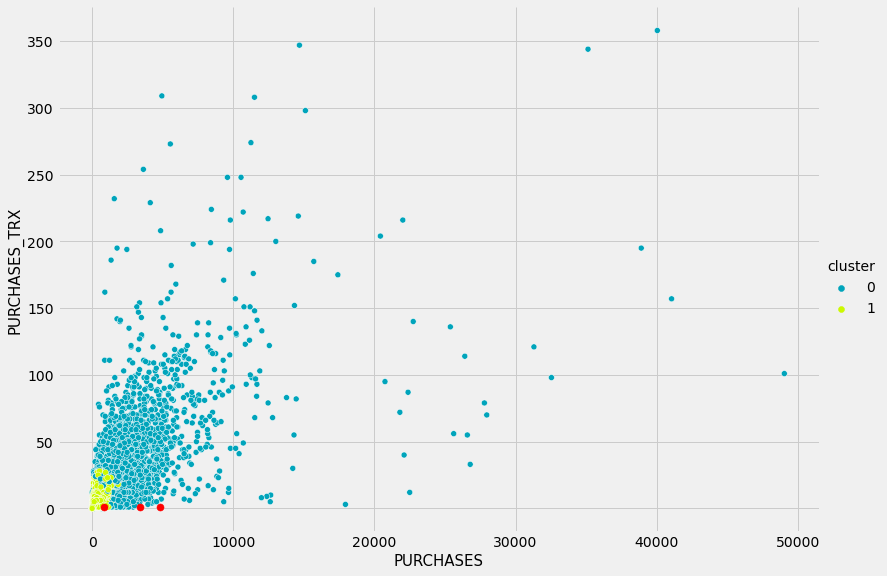

In [59]:
cluster_means = gmm.means_#for gaussian, we don't have centers,we have mean
cluster_means = scaler.inverse_transform(cluster_means)
print("cluster means:\n",cluster_means)

sns.relplot(data = df_cluster_with_gmm,x='PURCHASES' , y  ='PURCHASES_TRX', hue='cluster', palette='nipy_spectral',kind='scatter', height=8.27, aspect = 11.7/8.27)
plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=50)
plt.xlabel("PURCHASES",fontsize=15)
plt.ylabel("PURCHASES_TRX",fontsize=15)

### Ploting some continues features for seeing how to clustering

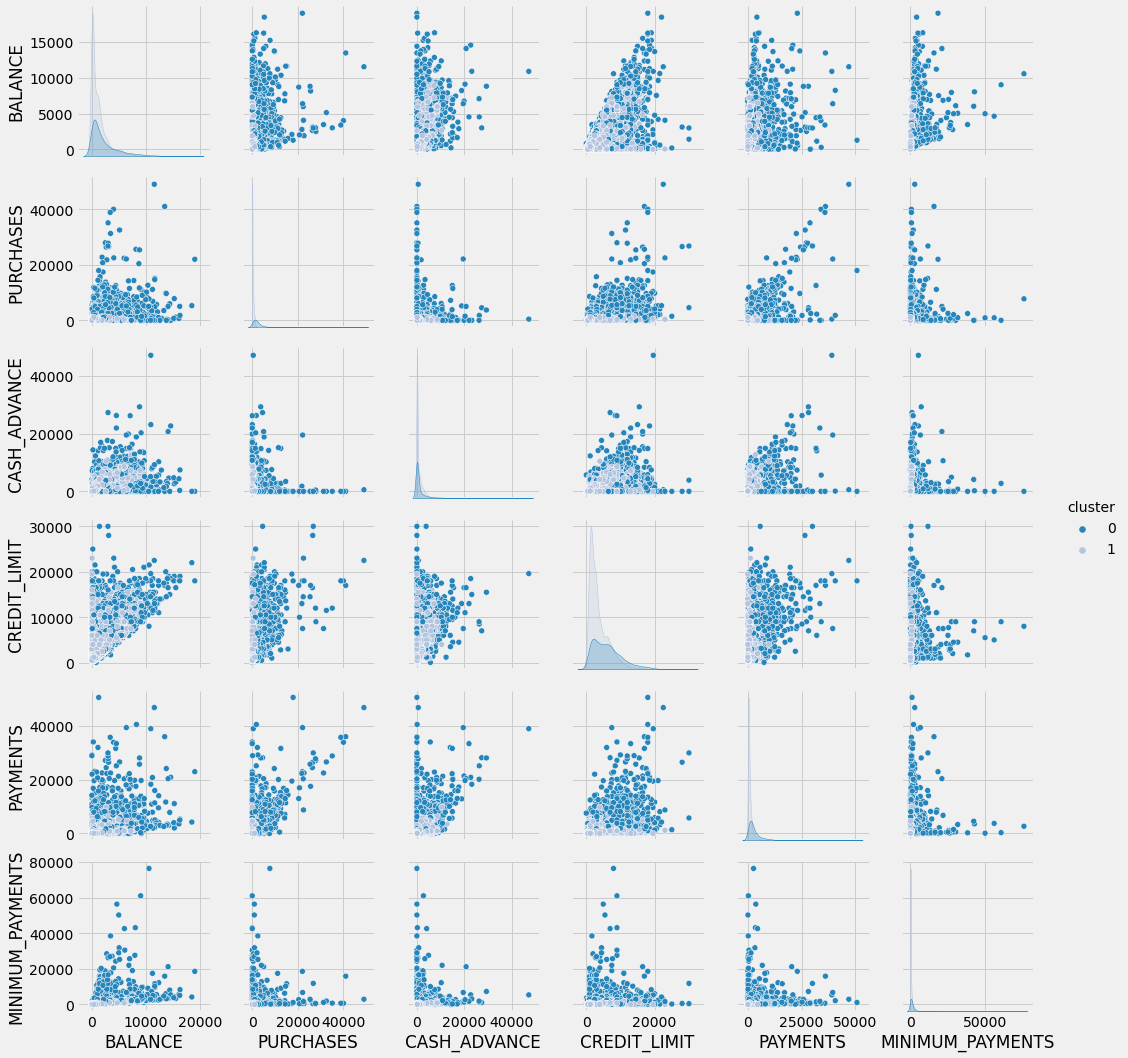

In [60]:
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","cluster"]
sns.pairplot( df_cluster_with_gmm[ best_cols ], hue="cluster",palette='PuBu_r')

#### <a id='e'></a>
<h1 style='background-color:pink;font-family:newtimeroman;font-size:350%;text-align:center;border-radius:15px 50px;'>12 :  Agglomerative Clustering</h1>

[📌 Table of Contents](#contents_tabel)

---

The agglomerative hierarchical clustering algorithm is a popular example of HCA. To group the datasets into clusters, it follows the __bottom-up approach__. It means, this algorithm considers each dataset as a single cluster at the beginning, and then start combining the closest pair of clusters together. It does this until all the clusters are merged into a single cluster that contains all the datasets.

---

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #F8EBEE; font-size:100%; text-align:left">
    
### Sillhuette coefficients:

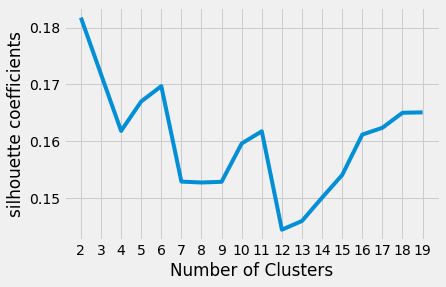

In [61]:
sil_Hierarch = []
for k in range(2,20):#this range is optional
    Hierarch = AgglomerativeClustering(n_clusters = k,linkage='ward')#linkage determines which distance to use between sets of observstion.alghorithm minimize this distance 
    score = silhouette_score(scaled_features, Hierarch.fit_predict(scaled_features),metric='euclidean')
    sil_Hierarch.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2,20), sil_Hierarch)
plt.xticks(range(2,20))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette coefficients")
plt.show()  

In [62]:
print("max silhouette score for Agglomerative method is:",max(sil_Hierarch))

max silhouette score for Agglomerative method is: 0.18174592785083818


<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #F8EBEE; font-size:100%; text-align:left">
    
### Calinski_harabasz:

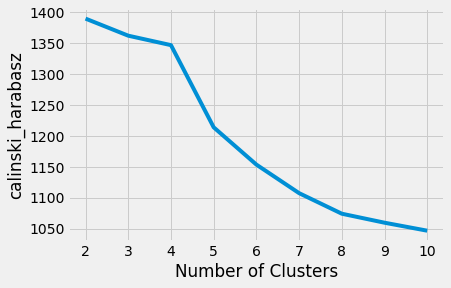

In [63]:
calinski_harabaz = []
for k in range (2,11):
    Hierarch = AgglomerativeClustering(n_clusters = k, linkage='ward')
    score = metrics.calinski_harabasz_score(scaled_features, Hierarch.fit_predict(scaled_features))
    calinski_harabaz.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), calinski_harabaz)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("calinski_harabasz")
plt.show()

In [64]:
print("max calinski_harabasz sore for Agglomerative method is:",max(calinski_harabaz))

max calinski_harabasz sore for Agglomerative method is: 1389.8251306482236


<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #F8EBEE; font-size:100%; text-align:left">
    
---
### **Notice:**
#### max calinski_harabasz sore for Agglomerative method is: 1389.8251306482236

#### So 2 cluster , is the best, for Agglomerative modeling

#### this algorithm dosn't have any attribute to find centers

---

In [65]:
Hierarch = AgglomerativeClustering(n_clusters =2,linkage='ward')
Hierarch.fit(scaled_features)
score = silhouette_score(scaled_features, Hierarch.fit_predict(scaled_features))
print("silhouette_score",score)

silhouette_score 0.18174592785083818


In [66]:
#adding cluster column to dataframe
labels = Hierarch.labels_
df_cluster_with_Hierarch = pd.concat([df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_with_Hierarch

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000               0.0            2.0        1000.0   
1                   0.250000               4.0            0.0        7000.0   
2                   0.000000               0.0           12.0        7500.0   
3                   0.083333               1.0            1.0        7500.0   
4                   0.000000               0.0            1.0        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000               0.0            6.0        1000.0   
8946                0.000000               0.0            6.0        1000.0   
8947                0.000000               0.0            5.0        1000.0   
8948                0.166667               2.0            0.0         500.0   
8949                0.333333               2.0           23.0        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0      201.802084        139.509787          0.000000    12.0        0  
1     4103.032597       1072.340217          0.222222    12.0        0  
2      622.066742        627.284787          0.000000    12.0        1  
3        0.000000        431.220633          0.000000    12.0        0  
4      678.334763        244.791237          0.000000    12.0        0  
...           ...               ...               ...     ...      ...  
8945   325.594462         48.886365          0.500000     6.0        0  
89

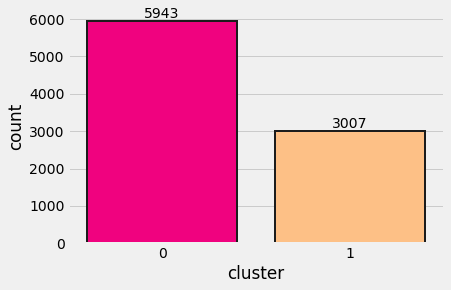

In [67]:
# counting number of clusters
ax = sns.countplot(data=df_cluster_with_Hierarch, x='cluster', palette='Accent_r', saturation=1, edgecolor = "#1c1c1c", linewidth = 2)
for cont in ax.containers:
    ax.bar_label(cont)

In [68]:
score = silhouette_score(scaled_features, Hierarch.labels_)
score

0.18174592785083818

Text(37.85165642806267, 0.5, 'PURCHASES_TRX')

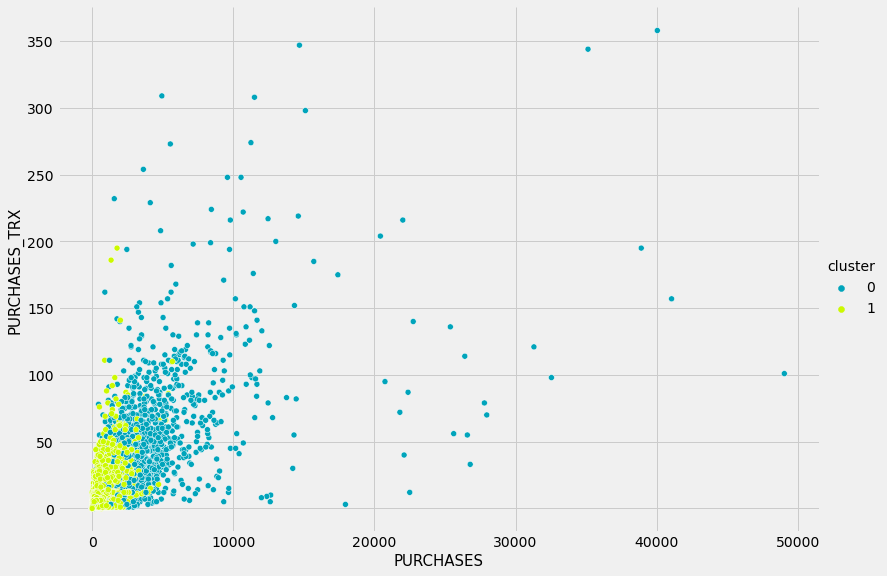

In [69]:
Hierarch = AgglomerativeClustering(n_clusters = 2).fit(df)

df_Hierarch = df.copy()
df_Hierarch['cluster'] = Hierarch.labels_

sns.relplot(data = df_Hierarch ,x='PURCHASES' , y  ='PURCHASES_TRX', hue='cluster', palette='nipy_spectral' ,kind='scatter', height=8.27, aspect = 11.7/8.27)
plt.xlabel("PURCHASES",fontsize=15)
plt.ylabel("PURCHASES_TRX",fontsize=15)

### Ploting some continues features for seeing how to clustering

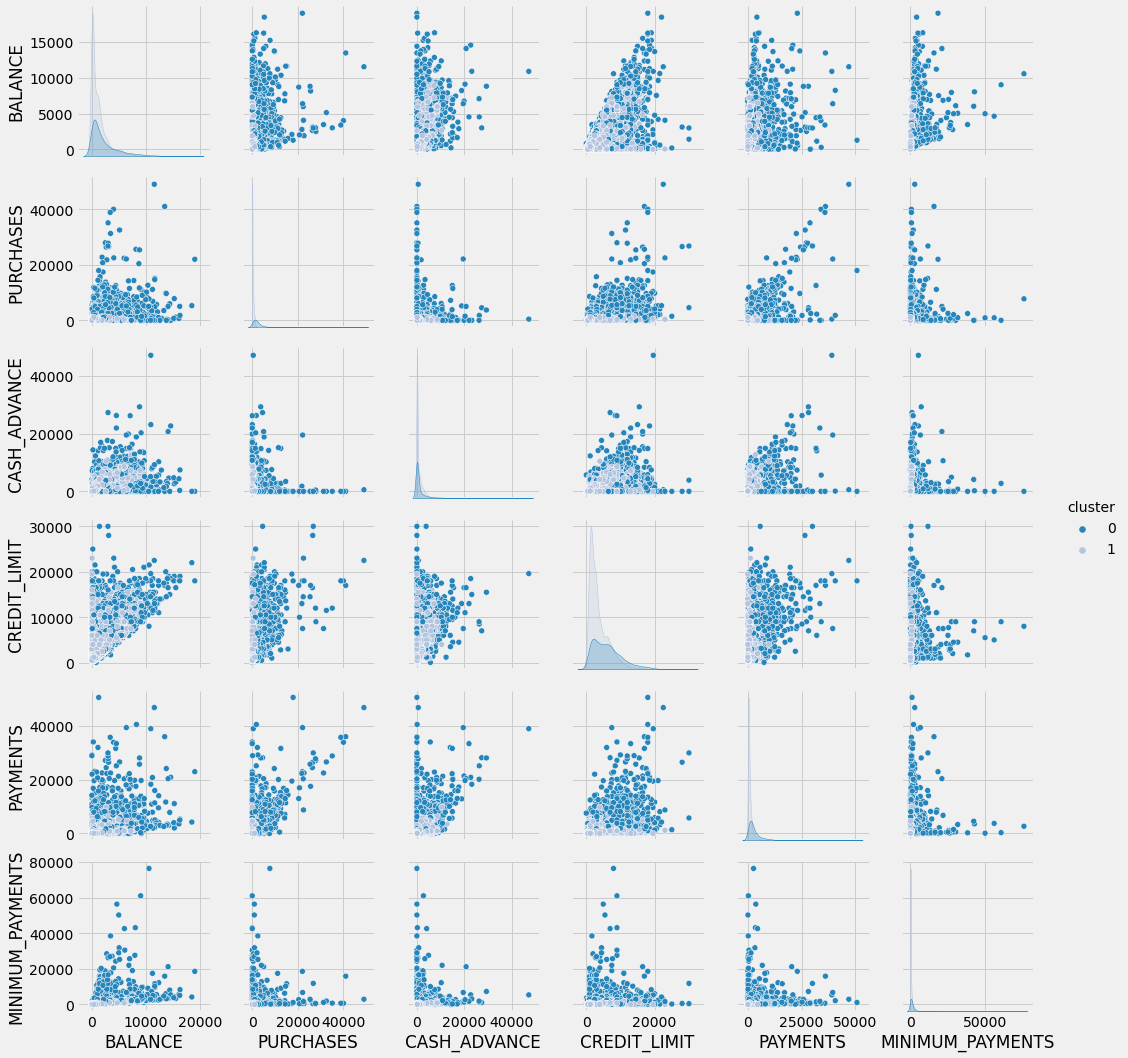

In [70]:
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","cluster"]
sns.pairplot( df_cluster_with_gmm[ best_cols ], hue="cluster",palette='PuBu_r')

#### <a id='e'></a>
<h1 style='background-color:pink;font-family:newtimeroman;font-size:350%;text-align:center;border-radius:15px 50px;'>13 :  MiniBatchKMeans</h1>

[📌 Table of Contents](#contents_tabel)

---
The __`MiniBatchKMeans`__ is a variant of the __`KMeans`__ algorithm which uses mini-batches to reduce the computation time, while still attempting to optimise the same objective function. Mini-batches are subsets of the input data, randomly sampled in each training iteration. These mini-batches drastically reduce the amount of computation required to converge to a local solution. In contrast to other algorithms that reduce the convergence time of k-means, mini-batch k-means produces results that are generally only slightly worse than the standard algorithm.

The algorithm iterates between two major steps, similar to vanilla k-means. In the first step, b samples are drawn randomly from the dataset, to form a mini-batch. These are then assigned to the nearest centroid. In the second step, the centroids are updated. In contrast to k-means, this is done on a per-sample basis. For each sample in the mini-batch, the assigned centroid is updated by taking the streaming average of the sample and all previous samples assigned to that centroid. This has the effect of decreasing the rate of change for a centroid over time. These steps are performed until convergence or a predetermined number of iterations is reached.

MiniBatchKMeans converges faster than KMeans, but the quality of the results is reduced. In practice this difference in quality can be quite small, as shown in the example and cited reference.

---

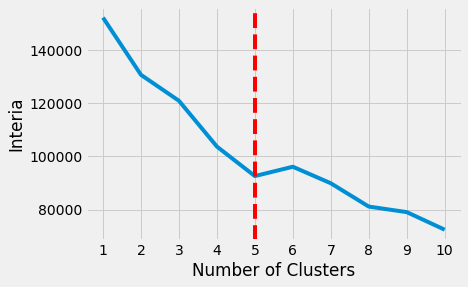

In [71]:
List = []
for k in range(1,11):#this range is optional
    minibatch = MiniBatchKMeans(n_clusters=k , random_state =42, batch_size=50) 
    minibatch.fit(scaled_features)
    List.append(minibatch.inertia_)

kl = KneeLocator(range(1,11), List, curve='convex', direction='decreasing')
kl.elbow
plt.style.use("fivethirtyeight")
plt.plot(range(1,11),List)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Interia")
plt.axvline(x=kl.elbow, color='r', label='axvline - full height', ls='--')
plt.show()    

* Based on the elbow method, the optimal number of clusters for kmeans algorithm is equal to 5.

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #F8EBEE; font-size:100%; text-align:left">
    
### Sillhuette coefficients:

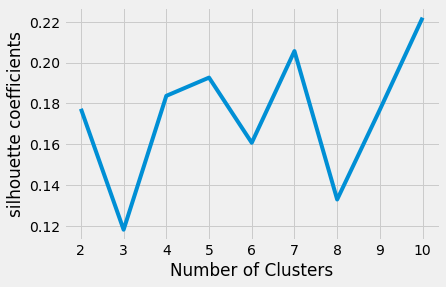

In [72]:
silhouette_coefficients = []
for k in range (2,11):
    minibatch = MiniBatchKMeans(n_clusters=k, random_state =42, batch_size=50) 
    minibatch.fit(scaled_features)
    score = silhouette_score(scaled_features, minibatch.predict(scaled_features))
    silhouette_coefficients.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette coefficients")
plt.show()    

In [73]:
max(silhouette_coefficients)

0.22211433724577506

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #F8EBEE; font-size:100%; text-align:left">
    
### Calinski_harabasz:

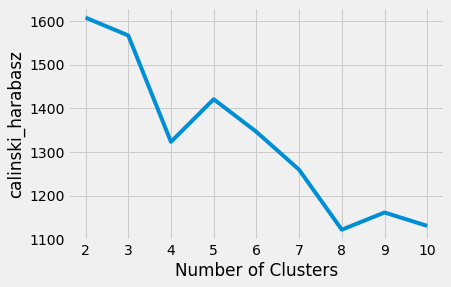

In [74]:
calinski_harabaz = []
for k in range (2,11):
    minibatch = MiniBatchKMeans(n_clusters=k, init='random' , random_state =42, batch_size=50)
    minibatch.fit(scaled_features)
    score = metrics.calinski_harabasz_score(scaled_features, minibatch.labels_)
    calinski_harabaz.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), calinski_harabaz)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("calinski_harabasz")
plt.show()

In [75]:
max(calinski_harabaz)

1607.4595798207592

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #F8EBEE; font-size:100%; text-align:left">
    
---
### **Notice:**
#### So 2 cluster with silhouette score =0.2093768793881529, is the best for mini batch k-mean modeling
 
---

In [76]:
# view cluster centers (scaled centers)

minibatch = MiniBatchKMeans(n_clusters=2, random_state =42, batch_size=50)
minibatch.fit(scaled_features)
labels = minibatch.labels_
cluster_centers = pd.DataFrame(data = minibatch.cluster_centers_, columns = [df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0  0.419475          0.203884 -0.302745        -0.178270   
1 -0.377605         -0.210763  0.258668         0.195446   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              -0.388404     0.413724           -0.766164   
1               0.252074    -0.394788            0.581654   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.260926                        -0.742995   
1                   0.283705                         0.489168   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               0.595478         0.462807     -0.423112     0.072109   
1              -0.511240        -0.383111      0.333776    -0.125789   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0  0.093156         0.059140        -0.413107 -0.068984  
1 -0.032429        -0.131444         0.349786  0.024421

In [77]:
# viewing real centers
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY    PURCHASES ONEOFF_PURCHASES  \
0  2437.577343          0.925569   356.384571       296.546250   
1   778.521735          0.827343  1555.852844       916.837656   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              59.838321  1846.470528            0.182852   
1             639.015188   150.981230            0.723796   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.124618                         0.069152   
1                   0.287092                         0.558845   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               0.254305         6.407143      4.192857  4756.607143   
1               0.032840         0.634375     23.006250  4036.562500   

      PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT  TENURE  
0  2002.821000       984.445266         0.032888  11.425  
1  1639.264445       539.449319         0.256021  11.550

In [78]:
#adding cluster column to dataframe
df_cluster_with_minibatch = pd.concat([df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_with_minibatch

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000               0.0            2.0        1000.0   
1                   0.250000               4.0            0.0        7000.0   
2                   0.000000               0.0           12.0        7500.0   
3                   0.083333               1.0            1.0        7500.0   
4                   0.000000               0.0            1.0        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000               0.0            6.0        1000.0   
8946                0.000000               0.0            6.0        1000.0   
8947                0.000000               0.0            5.0        1000.0   
8948                0.166667               2.0            0.0         500.0   
8949                0.333333               2.0           23.0        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0      201.802084        139.509787          0.000000    12.0        0  
1     4103.032597       1072.340217          0.222222    12.0        0  
2      622.066742        627.284787          0.000000    12.0        1  
3        0.000000        431.220633          0.000000    12.0        0  
4      678.334763        244.791237          0.000000    12.0        0  
...           ...               ...               ...     ...      ...  
8945   325.594462         48.886365          0.500000     6.0        1  
89

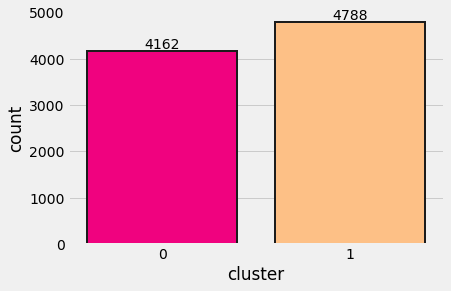

In [79]:
# counting number of clusters
ax = sns.countplot(data=df_cluster_with_minibatch, x='cluster', palette='Accent_r', saturation=1, edgecolor = "#1c1c1c", linewidth = 2)
for cont in ax.containers:
    ax.bar_label(cont)

## visualizing by inversing normalize data

[[2.43757734e+03 9.25568971e-01 3.56384571e+02 2.96546250e+02
  5.98383214e+01 1.84647053e+03 1.82851968e-01 1.24618350e-01
  6.91519750e-02 2.54305400e-01 6.40714286e+00 4.19285714e+00
  4.75660714e+03 2.00282100e+03 9.84445266e+02 3.28880464e-02
  1.14250000e+01]
 [7.78521735e+02 8.27342856e-01 1.55585284e+03 9.16837656e+02
  6.39015188e+02 1.50981230e+02 7.23796350e-01 2.87092316e-01
  5.58845187e-01 3.28398875e-02 6.34375000e-01 2.30062500e+01
  4.03656250e+03 1.63926444e+03 5.39449319e+02 2.56021012e-01
  1.15500000e+01]]


Text(37.85165642806267, 0.5, 'PURCHASES_TRX')

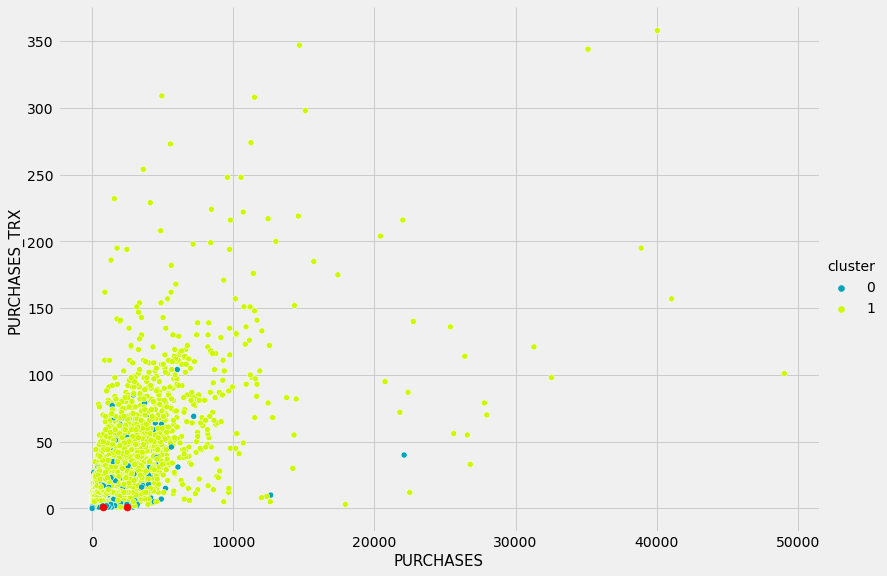

In [80]:
centroids = minibatch.cluster_centers_
centroids = scaler.inverse_transform(centroids)
print(centroids)


sns.relplot(data = df_cluster_with_minibatch ,x='PURCHASES' , y  ='PURCHASES_TRX', hue='cluster', palette='nipy_spectral' ,kind='scatter', height=8.27, aspect = 11.7/8.27)
plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=50)
plt.xlabel("PURCHASES",fontsize=15)
plt.ylabel("PURCHASES_TRX",fontsize=15)

Text(39.10062514838556, 0.5, 'CASH_ADVANCE')

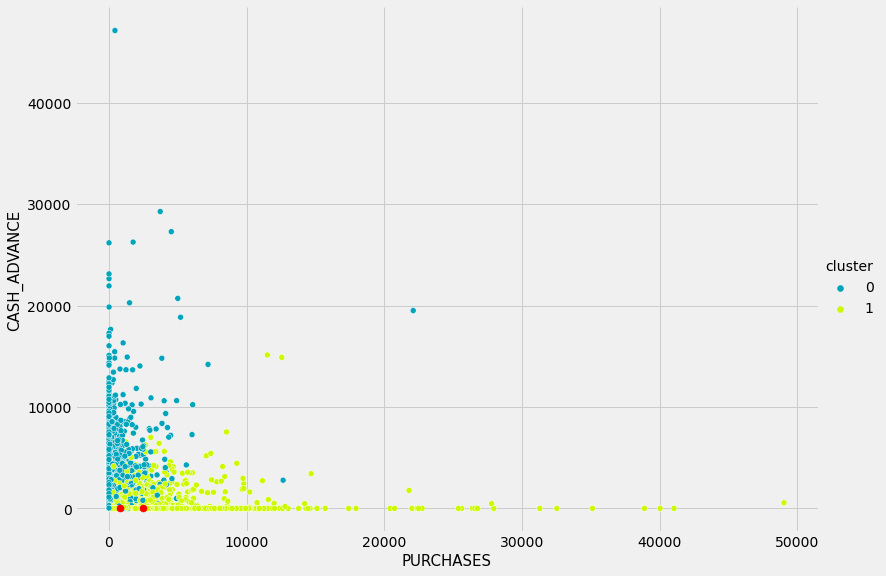

In [81]:
sns.relplot(data = df_cluster_with_minibatch ,x='PURCHASES' , y  ='CASH_ADVANCE', hue='cluster', palette='nipy_spectral' ,kind='scatter', height=8.27, aspect = 11.7/8.27)
plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=50)
plt.xlabel("PURCHASES",fontsize=15)
plt.ylabel("CASH_ADVANCE",fontsize=15)

## visualizing by original data

[[5.09841881e+03 9.41702743e-01 3.17764586e+03 2.24803971e+03
  9.29606143e+02 3.94317082e+03 4.93042643e-01 3.77813843e-01
  3.02149043e-01 3.10162829e-01 1.09714286e+01 3.40714286e+01
  1.11371429e+04 7.20374308e+03 1.81197370e+03 1.30708057e-01
  1.17571429e+01]
 [1.08445150e+03 8.64131762e-01 7.07972415e+02 4.13317396e+02
  2.94655019e+02 5.45856196e+02 4.68491317e-01 1.89274925e-01
  3.34042604e-01 1.13212977e-01 2.31886792e+00 1.16056604e+01
  3.47915094e+03 1.09640092e+03 6.06472260e+02 1.54690213e-01
  1.14566038e+01]]


Text(37.85165642806267, 0.5, 'PURCHASES_TRX')

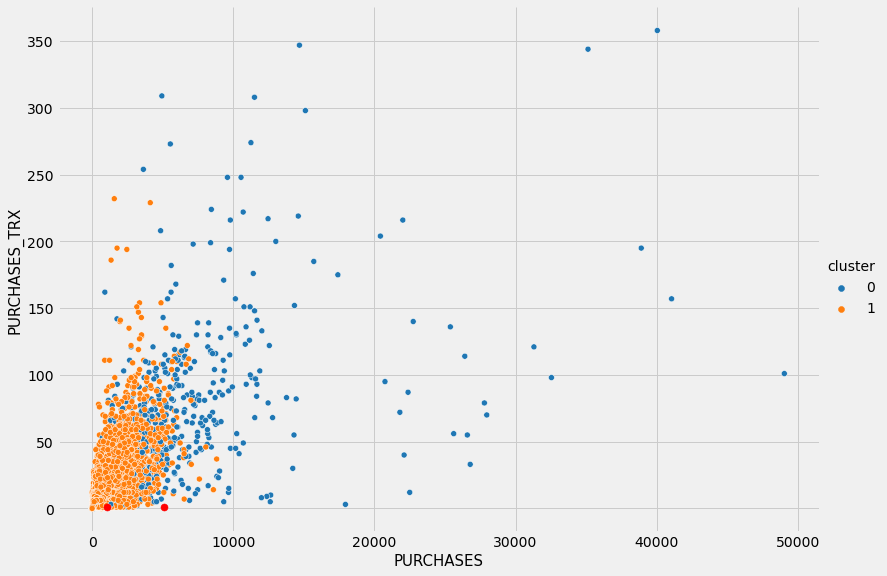

In [82]:
minibatch_df = minibatch.fit(df)
centroids = minibatch_df.cluster_centers_
print(centroids)

df_minibatch = df.copy()
df_minibatch['cluster'] = minibatch_df.labels_

sns.relplot(data = df_minibatch ,x='PURCHASES' , y  ='PURCHASES_TRX', hue='cluster', palette='tab10' ,kind='scatter', height=8.27, aspect = 11.7/8.27)
plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=50)
plt.xlabel("PURCHASES",fontsize=15)
plt.ylabel("PURCHASES_TRX",fontsize=15)

Text(39.10062514838556, 0.5, 'CASH_ADVANCE')

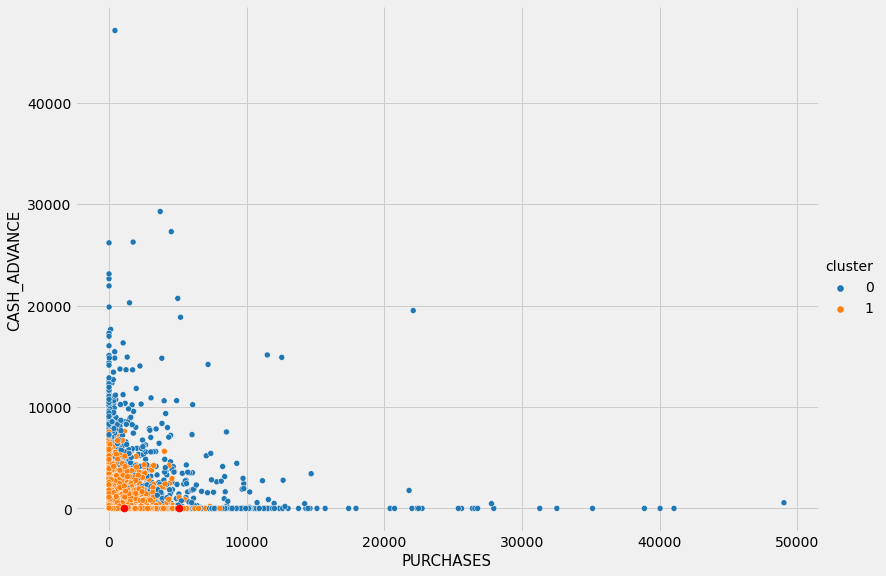

In [83]:
sns.relplot(data = df_minibatch ,x='PURCHASES' , y  ='CASH_ADVANCE', hue='cluster', palette='tab10' ,kind='scatter', height=8.27, aspect = 11.7/8.27)
plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=50)
plt.xlabel("PURCHASES",fontsize=15)
plt.ylabel("CASH_ADVANCE",fontsize=15)

### Ploting some continues features for seeing how to clustering

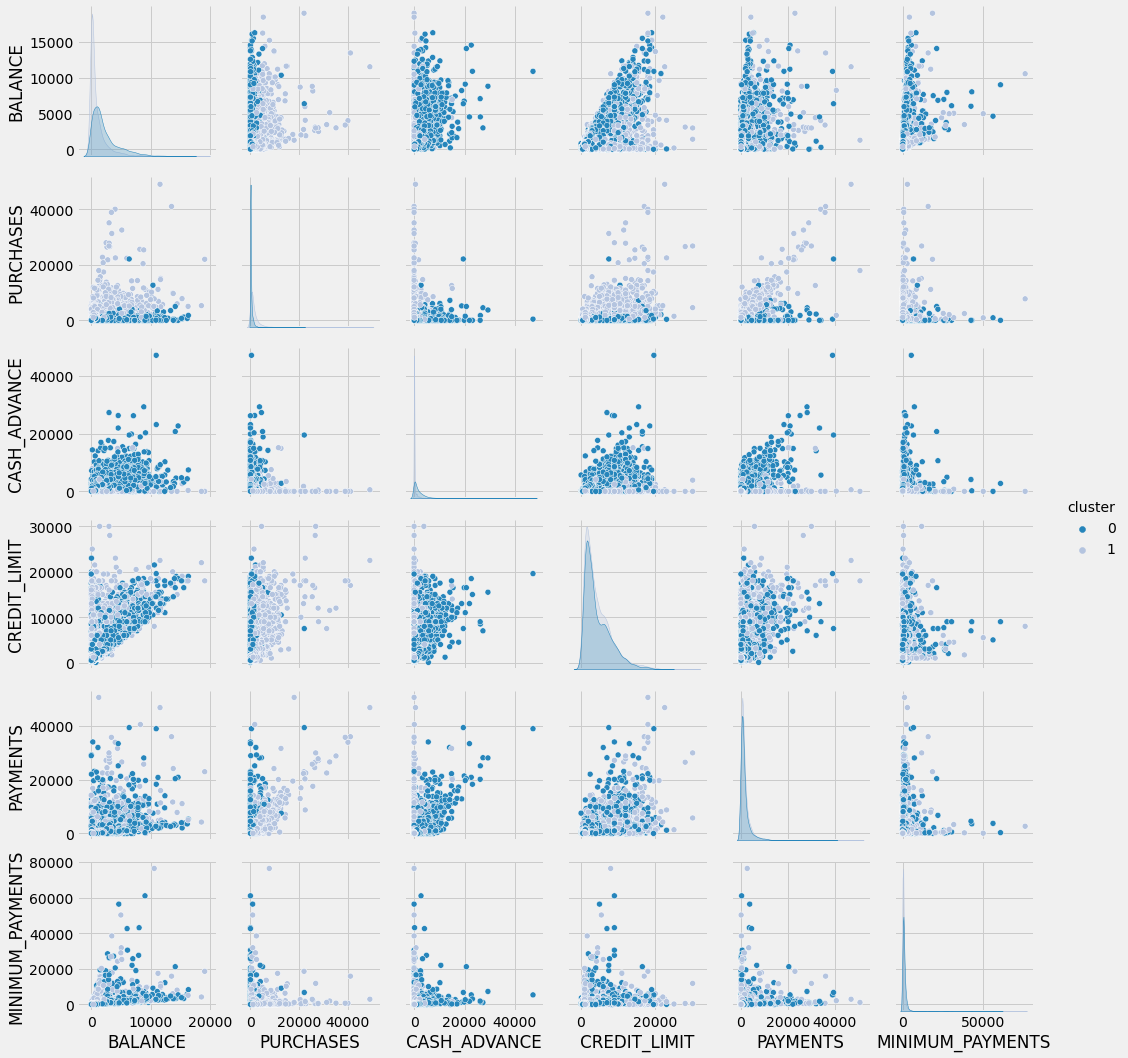

In [84]:
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","cluster"]
sns.pairplot( df_cluster_with_minibatch[ best_cols ], hue="cluster",palette='PuBu_r')

#### <a id='e'></a>
<h1 style='background-color:pink;font-family:newtimeroman;font-size:350%;text-align:center;border-radius:15px 50px;'>14 :  Comparing models</h1>

[📌 Table of Contents](#contents_tabel)

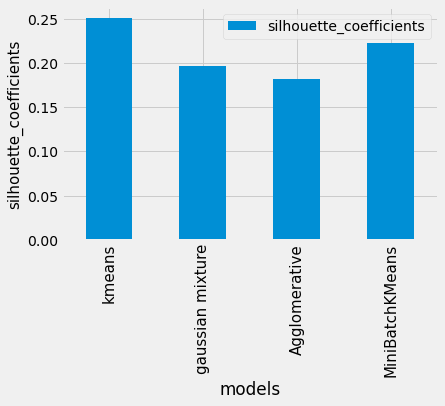

In [85]:
df12 = pd.DataFrame({'models':['kmeans','gaussian mixture','Agglomerative','MiniBatchKMeans'], 'silhouette_coefficients':[0.2508657080988788,0.19692270257015043,0.18174592785083818,0.22211433724577506]})
ax = df12.plot.bar(x='models', y='silhouette_coefficients', rot=90)
plt.xticks(fontsize=15)
plt.ylabel("silhouette_coefficients",fontsize=15)
plt.show()

#### <a id='e'></a>
<h1 style='background-color:pink;font-family:newtimeroman;font-size:350%;text-align:center;border-radius:15px 50px;'>15:  Eventually</h1>

[📌 Table of Contents](#contents_tabel)

--- 

### We choose between the four models, and k-mean has a highest score.
- [x] KMeans Clustering
- [ ] Gaussian mixture Clustering
- [ ] Agglomerative Clustering
- [ ] MiniBatchKMeans Clustering

---


# <span style='color:Green'> final data with clustering of k-mean algorithm </span> 

In [86]:
df_cluster_with_kmean

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000               0.0            2.0        1000.0   
1                   0.250000               4.0            0.0        7000.0   
2                   0.000000               0.0           12.0        7500.0   
3                   0.083333               1.0            1.0        7500.0   
4                   0.000000               0.0            1.0        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000               0.0            6.0        1000.0   
8946                0.000000               0.0            6.0        1000.0   
8947                0.000000               0.0            5.0        1000.0   
8948                0.166667               2.0            0.0         500.0   
8949                0.333333               2.0           23.0        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0      201.802084        139.509787          0.000000    12.0        2  
1     4103.032597       1072.340217          0.222222    12.0        0  
2      622.066742        627.284787          0.000000    12.0        2  
3        0.000000        431.220633          0.000000    12.0        2  
4      678.334763        244.791237          0.000000    12.0        2  
...           ...               ...               ...     ...      ...  
8945   325.594462         48.886365          0.500000     6.0        2  
89

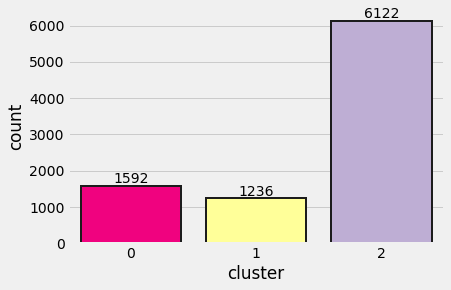

In [87]:
# counting number of clusters
ax = sns.countplot(data=df_cluster_with_kmean, x='cluster', palette='Accent_r', saturation=1, edgecolor = "#1c1c1c", linewidth = 2)
for cont in ax.containers:
    ax.bar_label(cont)

 * __most of the people at class 2__

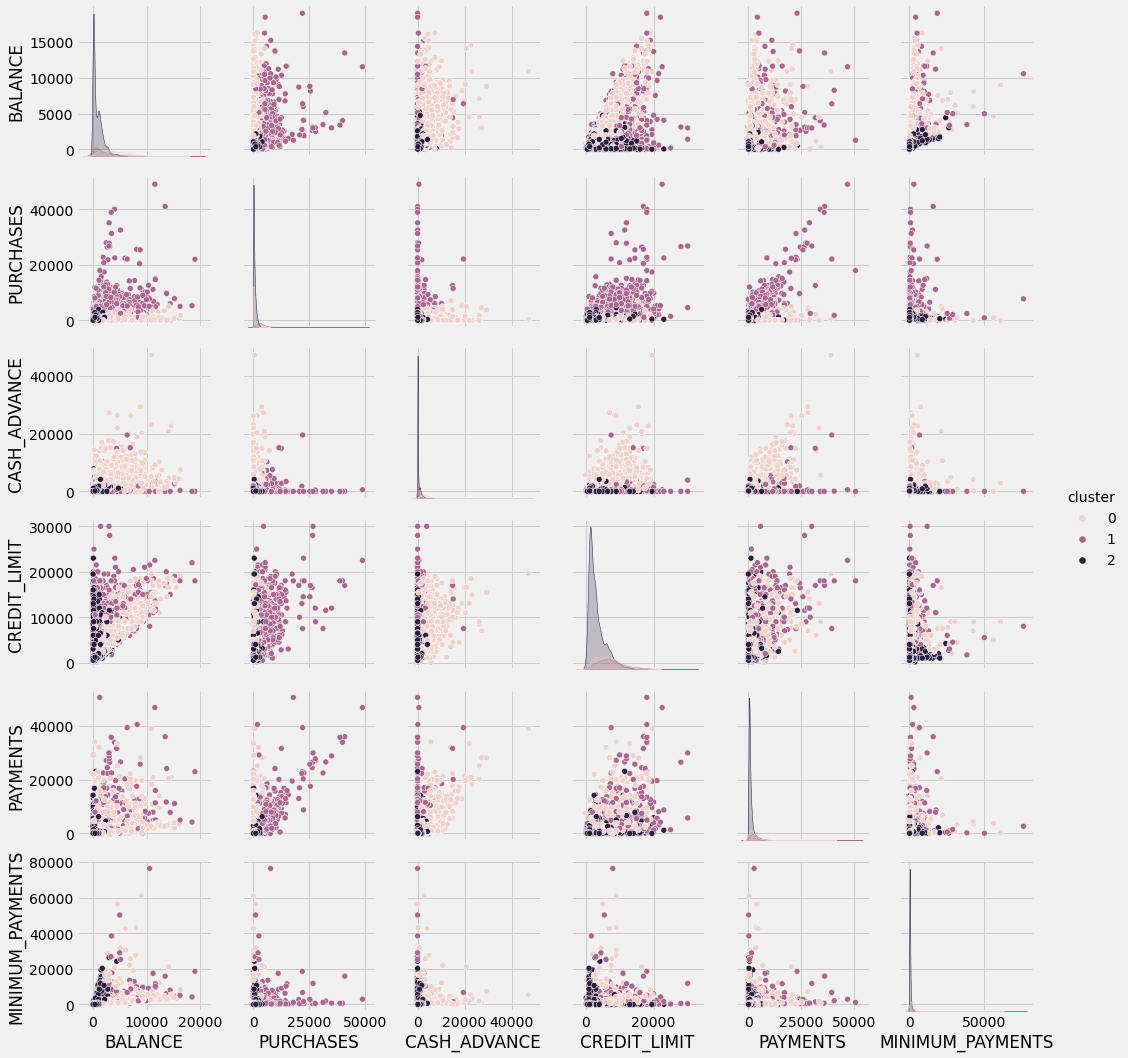

In [88]:
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","cluster"]
sns.pairplot( df_cluster_with_kmean[ best_cols ], hue="cluster")

<h2 align="left"><font color='purple'>All the best!😊</font></h2>